<a href="https://colab.research.google.com/github/white9812/2024_bootcamp/blob/main/model_0809_lag72_rollingmean72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: 구글 코랩 마운트하기

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (49.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and direc

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import os

In [ ]:
#합쳐진 데이터셋 불러오기
new_no_null_csv=os.listdir("/content/drive/MyDrive/no_na_data")
new_no_null_df=[]
test_df=[]
start_time="2017-01-01 01:00:00"
end_time="2023-02-28 23:00:00"
time=pd.date_range(start=start_time,end=end_time,freq="H")
print(len(time))
for concat_csv_path in new_no_null_csv:


    path="/content/drive/MyDrive/no_na_data/"
    c_df=pd.read_csv(path+f"{concat_csv_path}") #station의 데이터 이름에 데이터 프레임 저장하기
    print(len(c_df))
    c_df["date"]=time
    new_no_null_df.append(c_df[:-24*3])
    test_df.append(c_df[-24*3:])
    print(c_df.columns)



53999
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date'], dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date'],
      dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date'], dtype='object')
53999
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date'],
      dtype='object')
53999
Index

In [ ]:
test_df[0]

Solar_Power(MWh)    일사   일조    습도  지면온도      시정    기온  중하층운량   풍속  \
53927              4.30  0.00  0.0  87.0  -2.5  2677.0  -9.8    0.0  0.3   
53928              1.78  0.00  0.0  88.0  -3.3  2227.0 -10.8    0.0  0.0   
53929              0.39  0.00  0.0  89.0  -3.8  2598.0 -10.7    0.0  0.9   
53930              0.00  0.00  0.0  85.0  -4.5  3469.0 -10.9    0.0  0.0   
53931              0.00  0.00  0.0  87.0  -5.1  2661.0 -12.2    0.0  0.5   
...                 ...   ...  ...   ...   ...     ...   ...    ...  ...   
53994             54.75  0.01  0.0  38.0  -0.4  4128.0   3.4    0.0  6.6   
53995             74.80  0.00  0.0  55.0  -0.5  2925.0   2.5    0.0  5.2   
53996             73.18  0.00  0.0  67.0  -0.7  2208.0   1.7    0.0  4.9   
53997             49.00  0.00  0.0  76.0  -0.7  2009.0   1.2    0.0  5.9   
53998             19.37  0.00  0.0  77.0  -0.5  2256.0   1.2    7.0  4.6   

                     date  
53927 2023-02-26 00:00:00  
53928 2023-02-26 01:00:00  
53929 2023-02-26 02:00:00  
53930 2023-02-26 03:00:00  
53931 2023-02-26 04:00:00  
...                   ...  
53994 2023-02-28 19:00:00  
53995 2023-02-28 20:00:00  
53996 2023-02-28 21:00:00  
53997 2023-02-28 22:00:00  
53998 2023-02-28 23:00:00  

[72 rows x 10 columns]

In [ ]:
import re

In [ ]:
names=[]
for i in new_no_null_csv:



    pattern=r".*_(.*?)\.csv"
    name=re.findall(pattern,i)[0]
    names.append(name)


In [ ]:
names

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주시',
 '대구시',
 '서울시',
 '부산시',
 '대전시',
 '울산시',
 '세종시',
 '전라남도',
 '인천시',
 '전라북도',
 '충청남도',
 '제주도',
 '충청북도']

In [ ]:

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split



In [ ]:
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

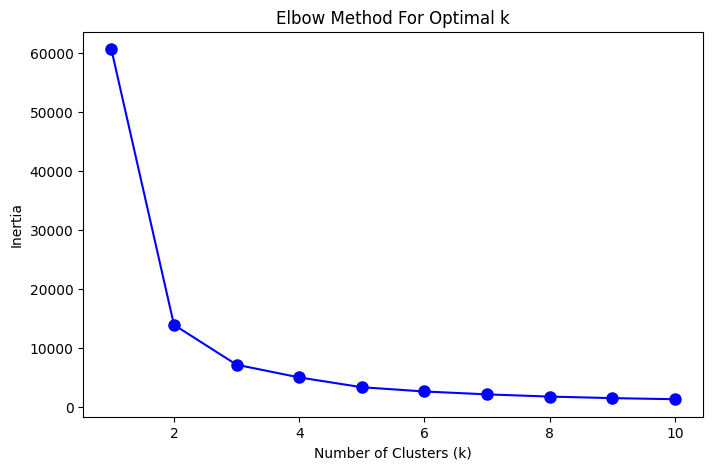

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

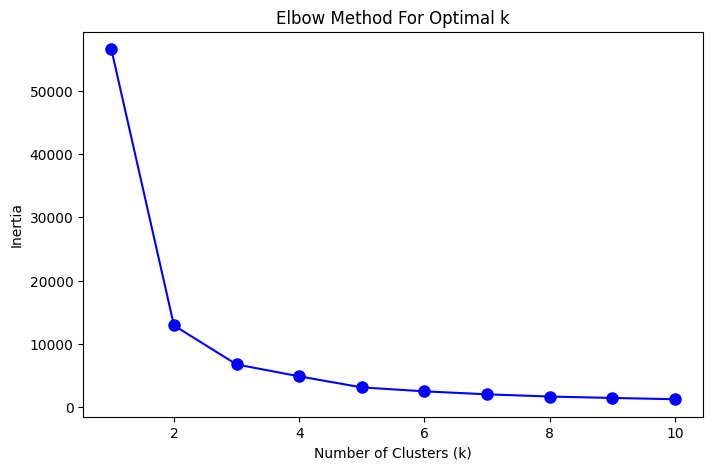

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

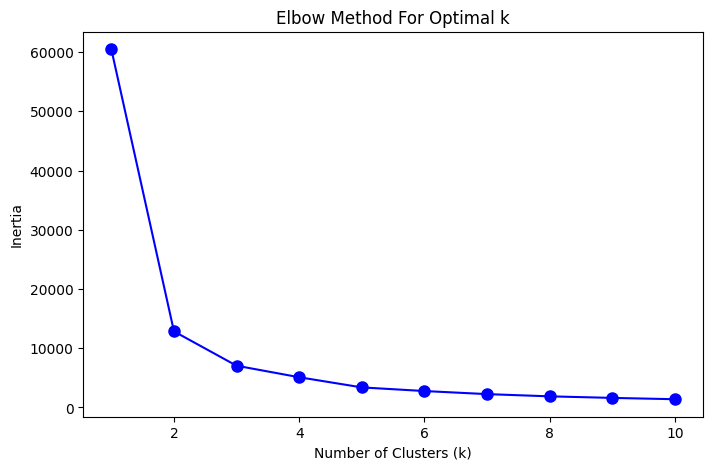

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

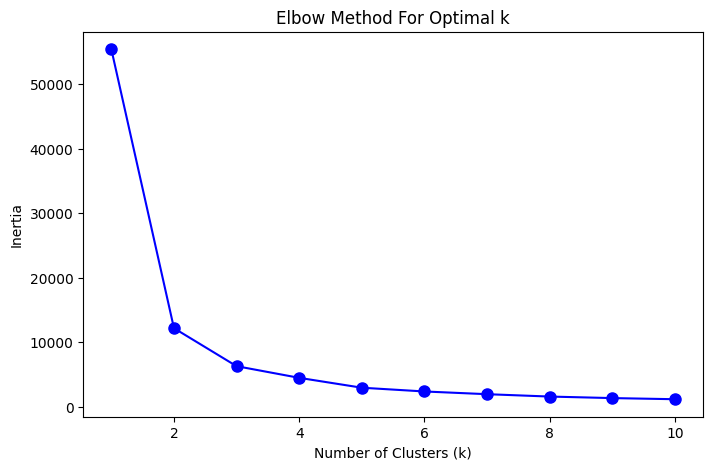

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

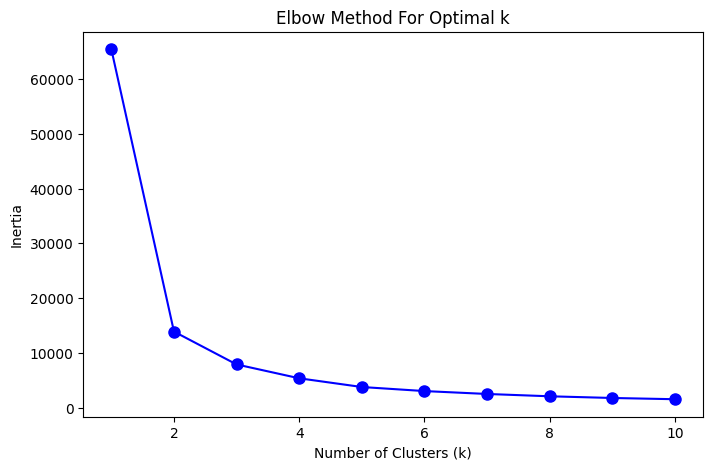

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

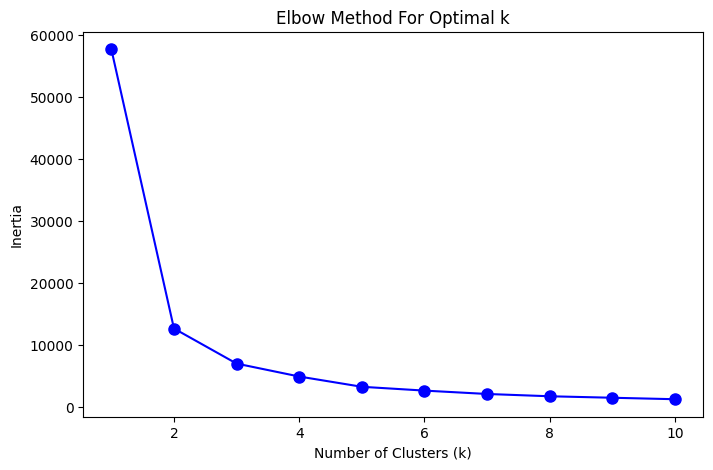

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

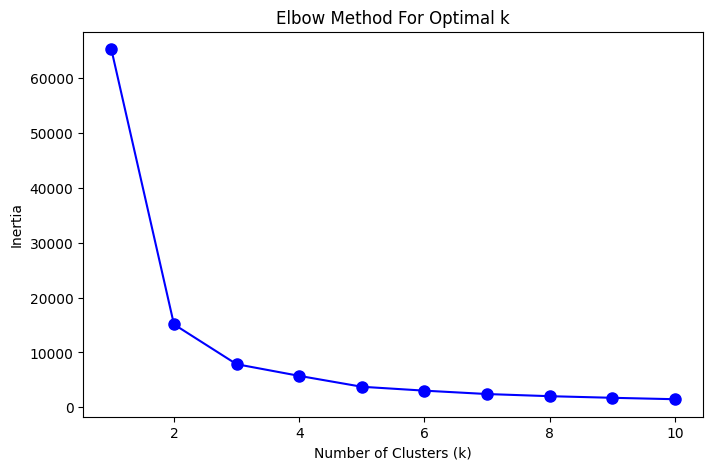

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

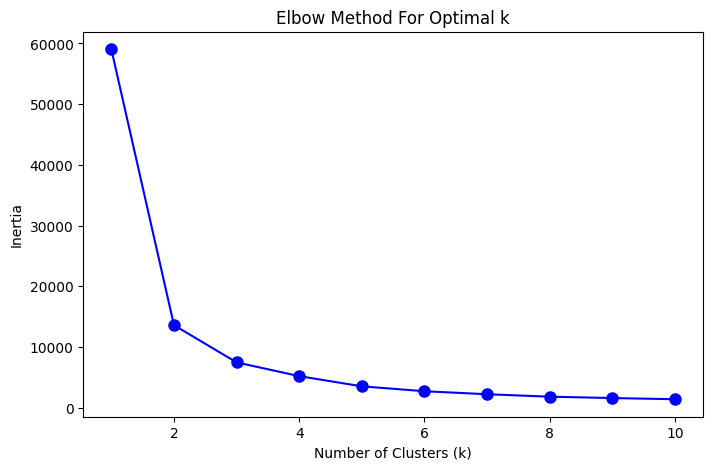

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

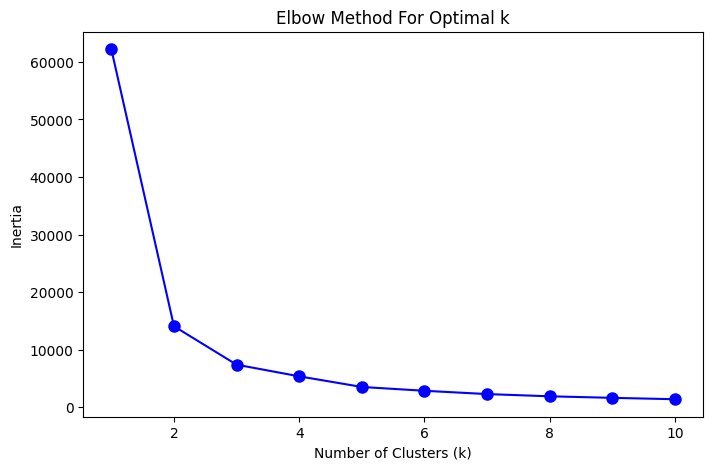

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

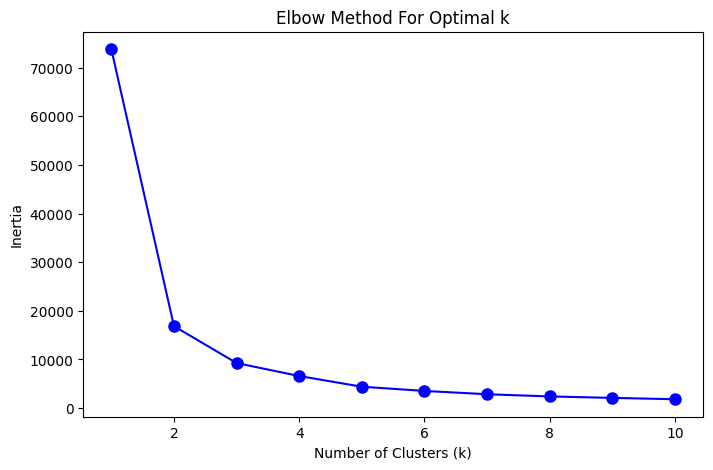

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

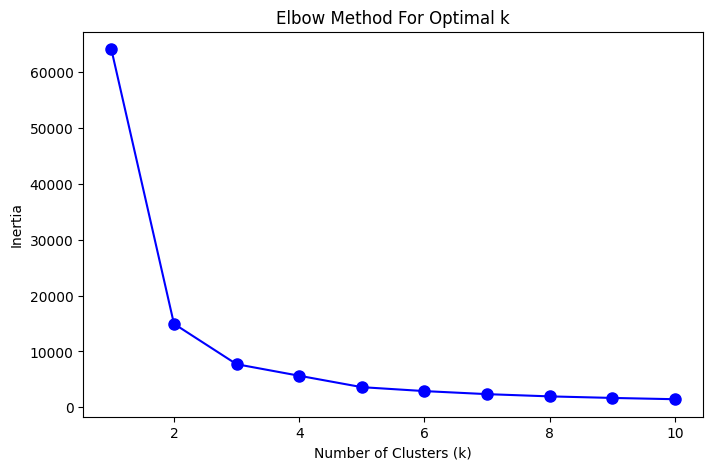

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

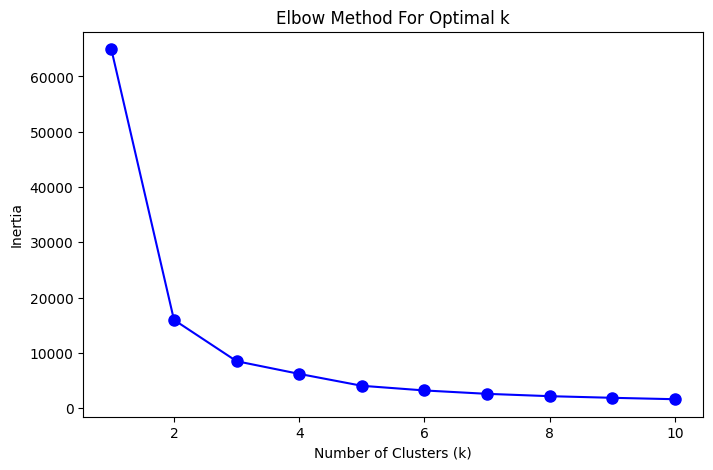

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

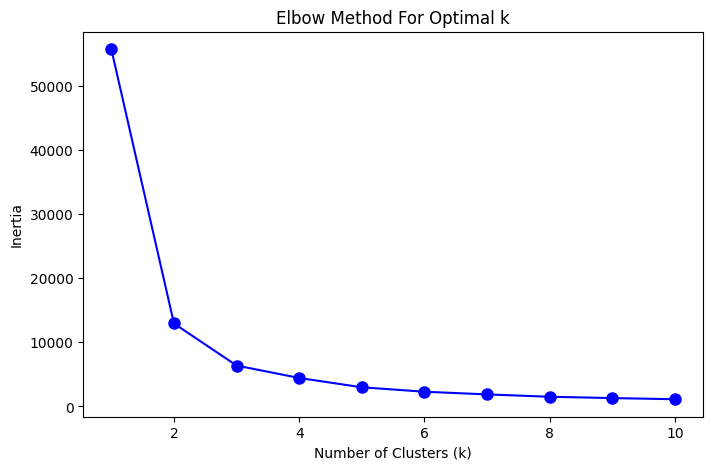

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

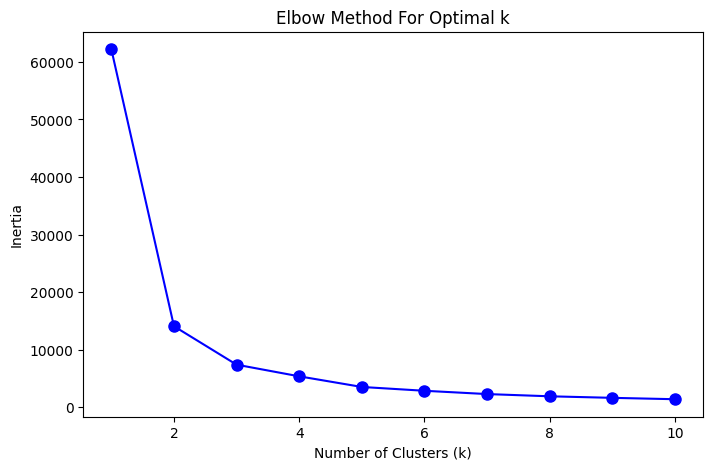

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

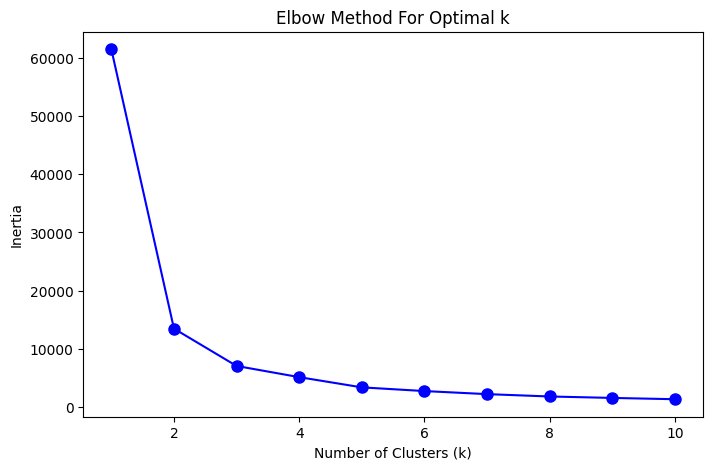

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

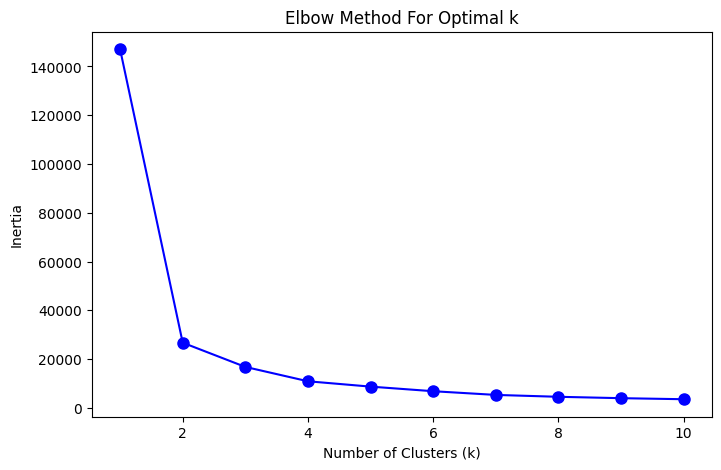

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

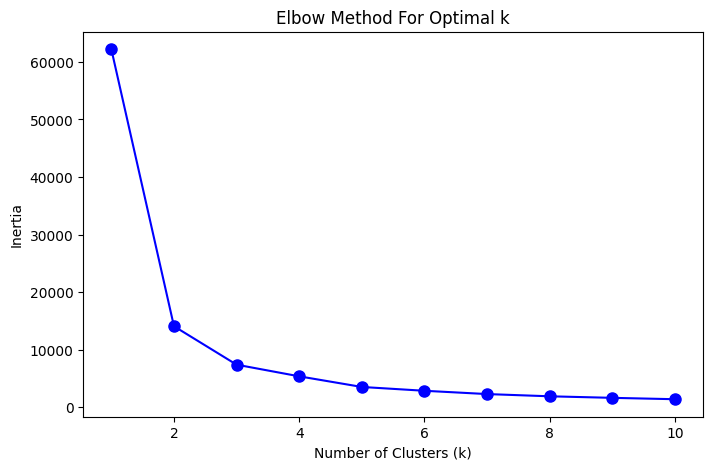

In [ ]:
for clurstering_df in new_no_null_df:
  scaler = RobustScaler()
  data_scaled = scaler.fit_transform(clurstering_df[['일사', '일조']])
  # 클러스터 수를 달리하면서 KMeans 적용 및 Inertia 계산
  inertia_values = []
  K = range(1, 11)  # 1부터 10까지 클러스터 수에 대해 테스트

  for k in K:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(data_scaled)
      inertia_values.append(kmeans.inertia_)

  # Inertia 값 시각화
  plt.figure(figsize=(8, 5))
  plt.plot(K, inertia_values, 'bo-', markersize=8)
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method For Optimal k')
  plt.show()


In [ ]:
import matplotlib.font_manager as font_manager

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = font_manager.FontProperties(fname=font_path)


데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1414
[LightGBM] [Info] Number of data points in the train set: 3436, number of used features: 12
[LightGBM] [Info] Start training from score 0.145359
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '

<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4463 (\N{HANGUL JUNGSEONG WEO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: User

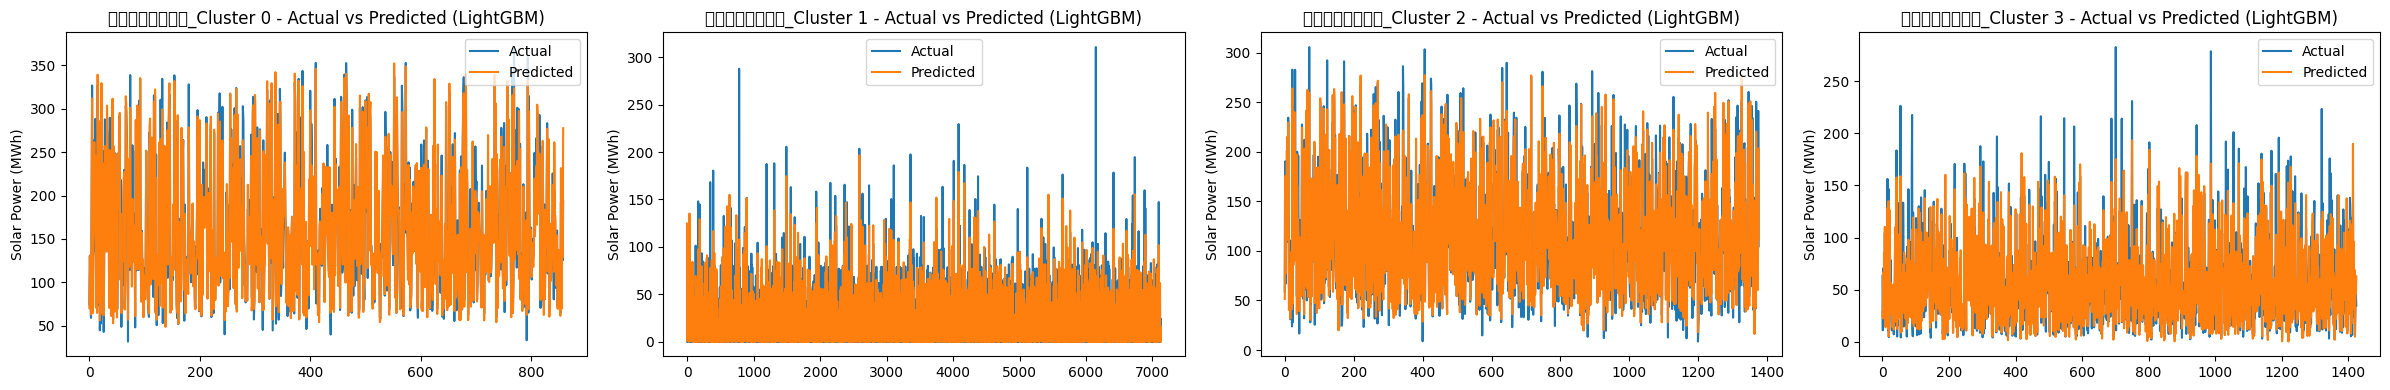

강원도_RMSE scores: [19.842010424177165, 13.58322433159657, 21.400731312282627, 19.65630323646588]
강원도_MAE scores: [13.048885441097841, 7.941449109791864, 15.03657064628411, 13.014651773944129]
강원도_SMAPE scores: [8.63679767530236, 121.26818904220085, 14.721095443549343, 26.641004545253555]
강원도_MAPE scores: [9.144944273440906, inf, 16.4112235148795, 30.36190159845713]
강원도_Average RMSE: 18.620567326130562
강원도_Average MAE: 12.260389242779487
강원도_Average SMAPE: 42.81677167657652
강원도_Average MAPE: inf
강원도_Cluster 0 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
강원도_Cluster 1 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
강원도_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
강원도_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.1}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하

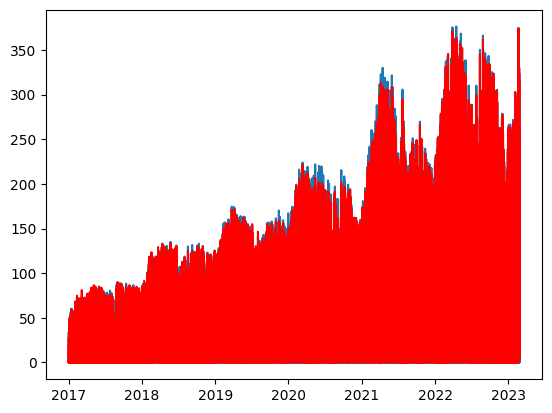

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 28788, number of used features: 11
[LightGBM] [Info] Start training from score 0.857353


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhe

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4455 (\N{HANGUL JUNGSEONG YEO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}

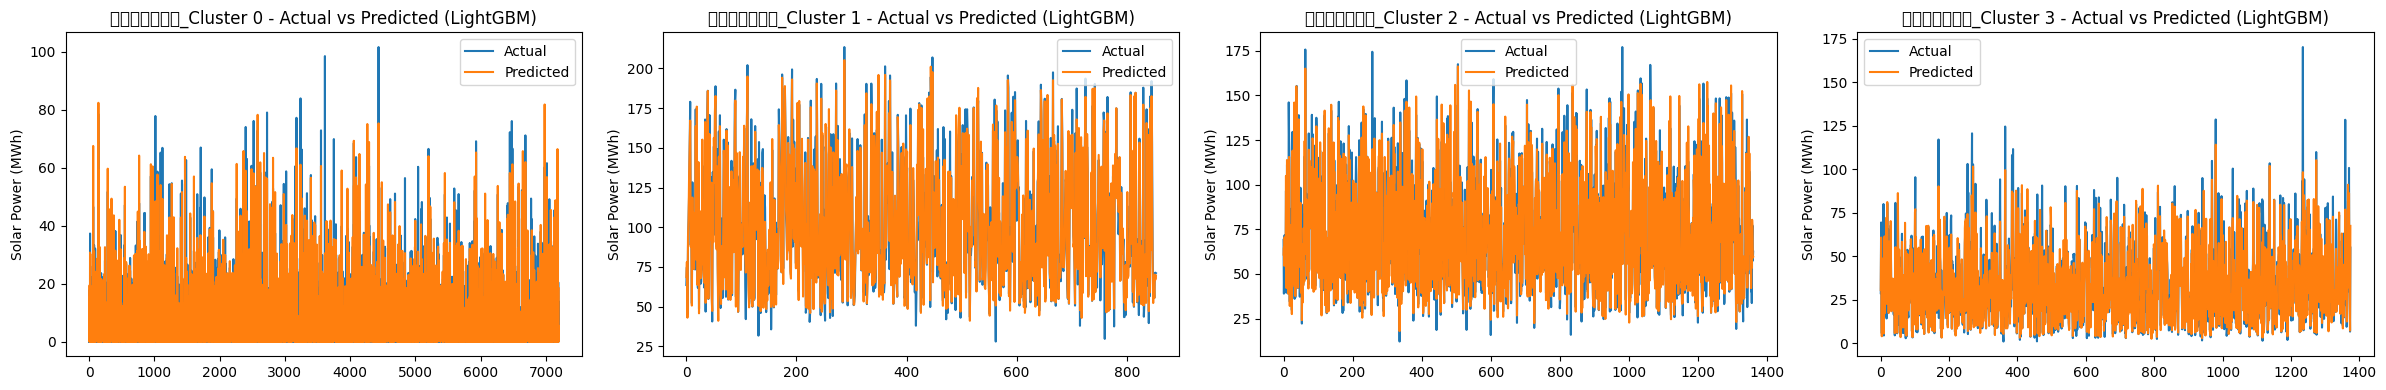

경기도_RMSE scores: [4.245607470844062, 9.748787915182222, 9.865324726933999, 8.192109068571032]
경기도_MAE scores: [2.269036717345197, 6.639735863019804, 6.684244194048255, 5.14677466418695]
경기도_SMAPE scores: [126.00435445082898, 6.88761703953621, 9.555781280770562, 15.907900340823087]
경기도_MAPE scores: [inf, 7.170929666228383, 9.952695180253228, 19.678305241979878]
경기도_Average RMSE: 8.01295729538283
경기도_Average MAE: 5.184947859650052
경기도_Average SMAPE: 39.58891327798971
경기도_Average MAPE: inf
경기도_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
경기도_Cluster 1 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.1}
경기도_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
경기도_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       '

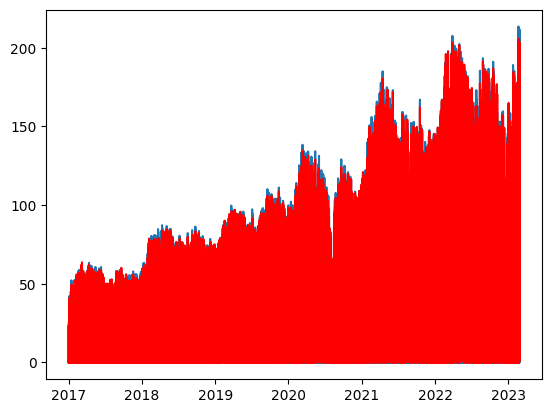

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '적설',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 27709, number of used features: 14
[LightGBM] [Info] Start training 

<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '적설',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitti

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4455 (\N{HANGUL JUNGSEONG YEO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4354 (\N{HANGUL CHOSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4535 (\N{HANGUL JONGSEONG MIEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWa

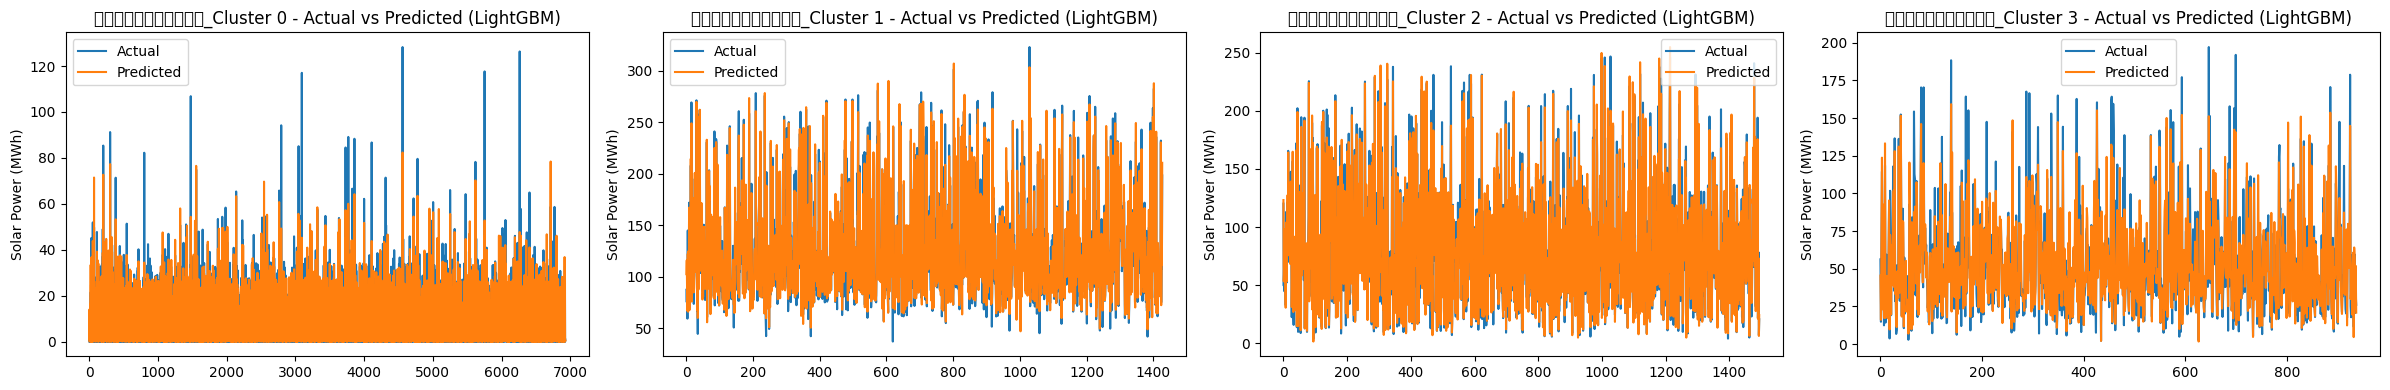

경상남도_RMSE scores: [4.310245458982164, 11.268119488123428, 10.73592123010314, 14.810153699548426]
경상남도_MAE scores: [2.0696084594351025, 7.920967607949411, 7.285579926397845, 10.19788415552033]
경상남도_SMAPE scores: [86.06637824553492, 6.583570318355132, 10.621197541006092, 20.397355442952474]
경상남도_MAPE scores: [inf, 6.750930080528319, 11.057858481497211, 22.774691470332094]
경상남도_Average RMSE: 10.28110996918929
경상남도_Average MAE: 6.868510037325672
경상남도_Average SMAPE: 30.917125386962155
경상남도_Average MAPE: inf
경상남도_Cluster 0 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
경상남도_Cluster 1 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
경상남도_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
경상남도_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사'

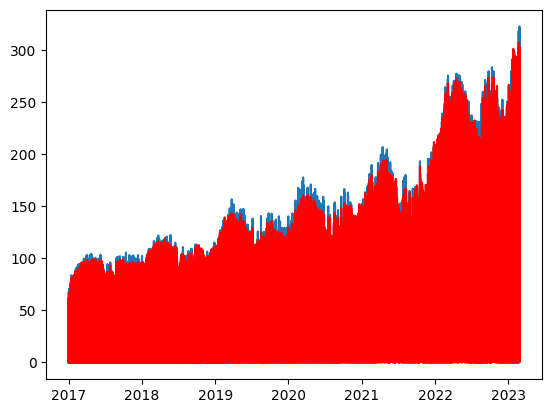

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', '풍향', 'Cluster',
       'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1363
[LightGBM] [Info] Number of data points in the train set: 28502, number of used features: 13
[LightGBM] [Info] Start training from score 0.534778


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', '풍향', 'Cluster',
       'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalli

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4455 (\N{HANGUL JUNGSEONG YEO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarnin

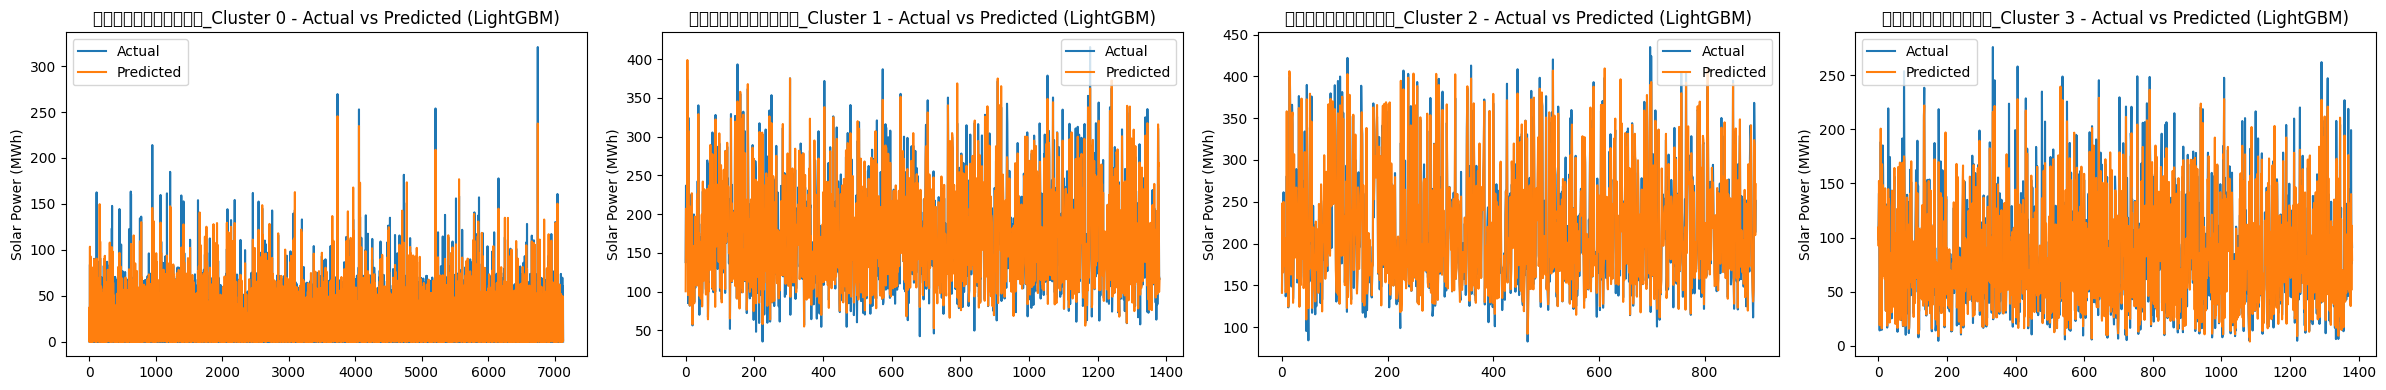

경상북도_RMSE scores: [12.794635951669227, 20.60111109094385, 18.074053744239553, 18.60801001295302]
경상북도_MAE scores: [7.884536900073202, 15.258654517133094, 12.808127589730828, 12.60981693304268]
경상북도_SMAPE scores: [110.16788442836003, 9.594932764220745, 5.95083660800338, 16.2345123230697]
경상북도_MAPE scores: [inf, 10.011741262724074, 6.086176887034587, 17.48244476366454]
경상북도_Average RMSE: 17.51945269995141
경상북도_Average MAE: 12.140283984994952
경상북도_Average SMAPE: 35.487041530913466
경상북도_Average MAPE: inf
경상북도_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
경상북도_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
경상북도_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
경상북도_Cluster 3 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사',

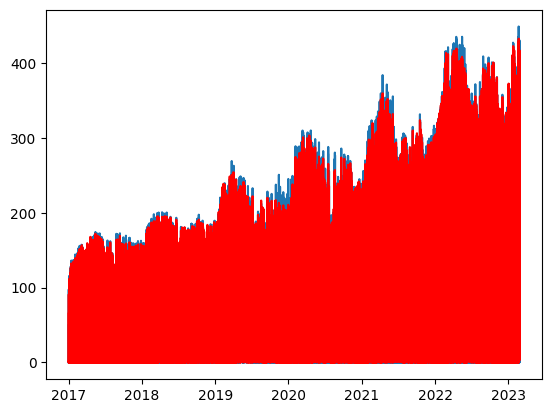

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '풍향',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 3953, number of used features: 14
[LightGBM] [Info] Start training f

<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '풍향',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dty

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4458 (\N{HANGUL JUNGSEONG WA}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning

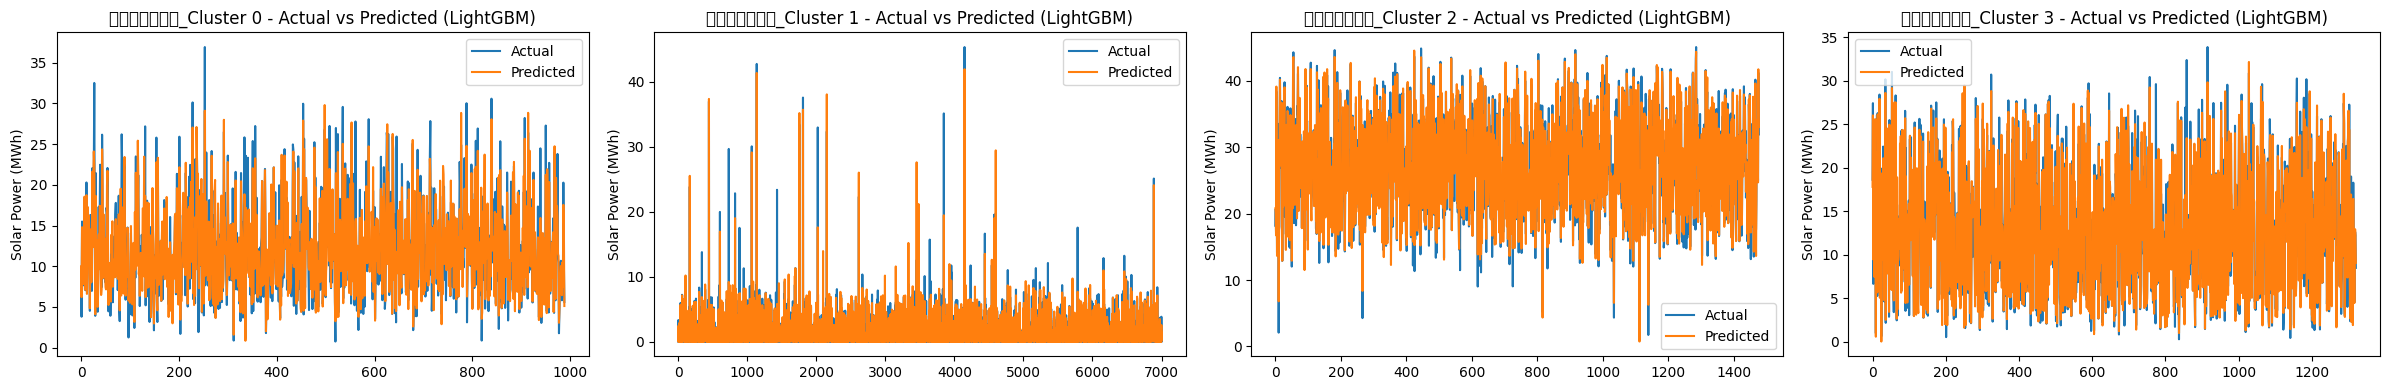

광주시_RMSE scores: [2.570804058066659, 0.8988195836663914, 2.0186895086052483, 1.8887353014101307]
광주시_MAE scores: [1.8237055710196843, 0.40882298928380295, 1.358424852893242, 1.2145140177630198]
광주시_SMAPE scores: [16.35993714049954, 117.27131110836567, 5.664057190357997, 11.636738019620163]
광주시_MAPE scores: [18.11535731504661, inf, 5.993885822790684, 13.259019693958724]
광주시_Average RMSE: 1.8442621129371073
광주시_Average MAE: 1.2013668577399375
광주시_Average SMAPE: 37.73301086471084
광주시_Average MAPE: inf
광주시_Cluster 0 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
광주시_Cluster 1 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
광주시_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
광주시_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍

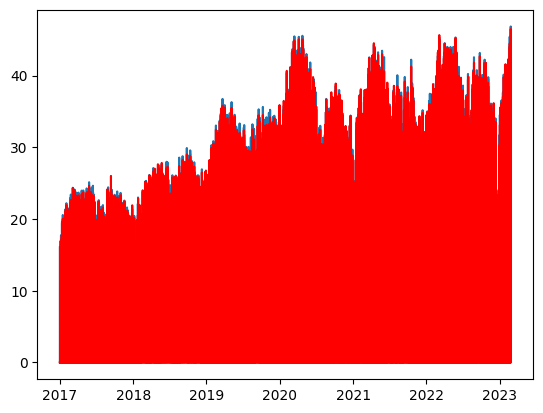

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 27394, number of used features: 12
[LightGBM] [Info] Start training from score 0.611606


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing r

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4450 (\N{HANGUL JUNGSEONG AE}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_cl

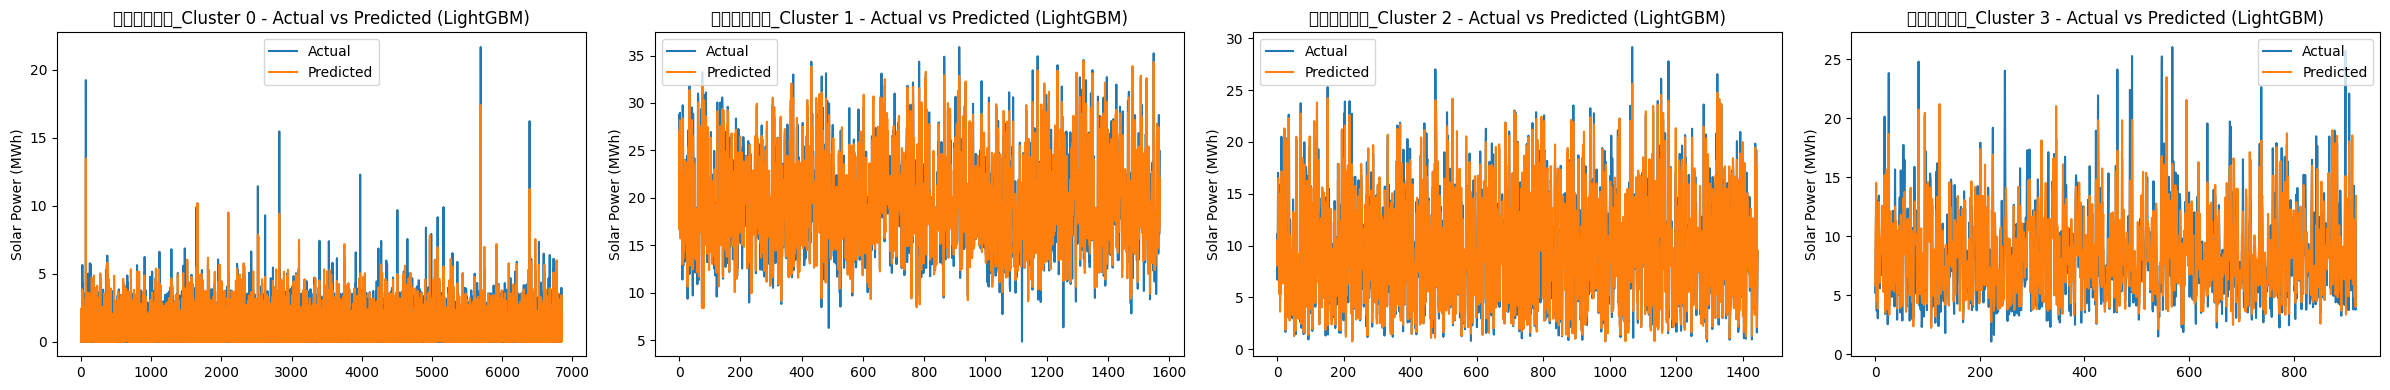

대구시_RMSE scores: [0.696325941913529, 1.6774689581924582, 1.2614362054538055, 2.2475887164504553]
대구시_MAE scores: [0.40231255418134787, 1.1547259830162087, 0.8175813966513736, 1.605535384910747]
대구시_SMAPE scores: [136.9389911026014, 6.288720194464324, 9.845451340347637, 19.370192550993963]
대구시_MAPE scores: [inf, 6.594363091836833, 10.60206065694422, 20.756310890753113]
대구시_Average RMSE: 1.470704955502562
대구시_Average MAE: 0.9950388296899193
대구시_Average SMAPE: 43.110838797101835
대구시_Average MAPE: inf
대구시_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
대구시_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
대구시_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
대구시_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'd

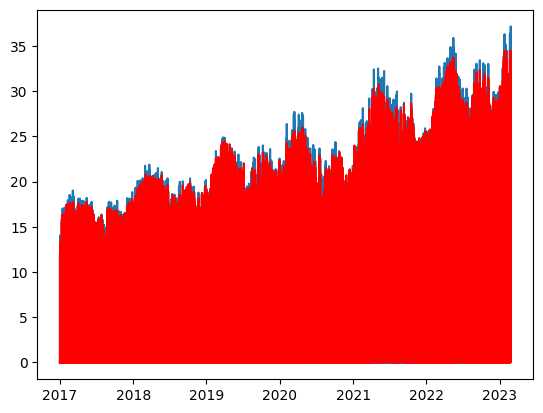

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '기온', '풍속', 'Cluster', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 27890, number of used features: 10
[LightGBM] [Info] Start training from score 2.459370


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '기온', '풍속', 'Cluster', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001180 sec

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clust

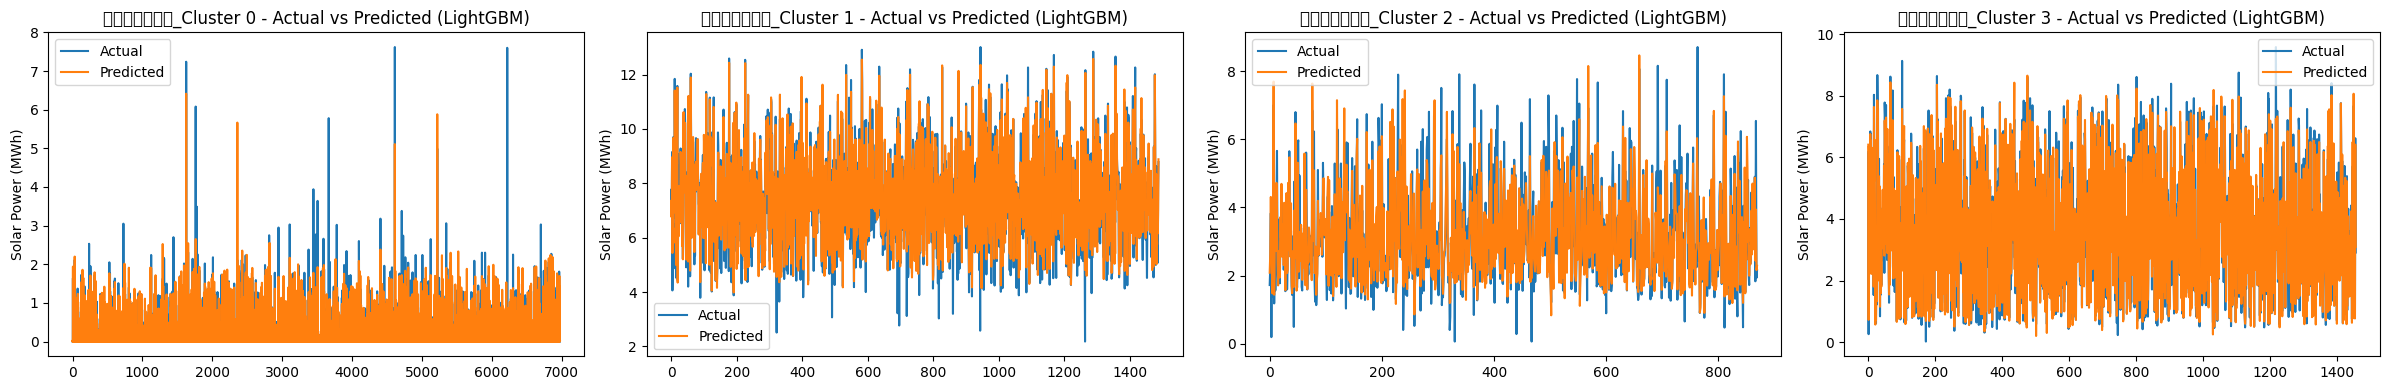

서울시_RMSE scores: [0.19639485631086923, 0.6597775967004732, 0.8849638494131011, 0.5547682356279224]
서울시_MAE scores: [0.05522603628955919, 0.4649253930429395, 0.6142681095080859, 0.36052780987325095]
서울시_SMAPE scores: [151.86868292627466, 6.866724316593829, 19.996778044383205, 11.720987868306002]
서울시_MAPE scores: [inf, 7.1693589363507835, 29.684071729461277, 15.137541391791201]
서울시_Average RMSE: 0.5739761345130915
서울시_Average MAE: 0.37373683717845885
서울시_Average SMAPE: 47.61329328888942
서울시_Average MAPE: inf
서울시_Cluster 0 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
서울시_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
서울시_Cluster 2 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
서울시_Cluster 3 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'd

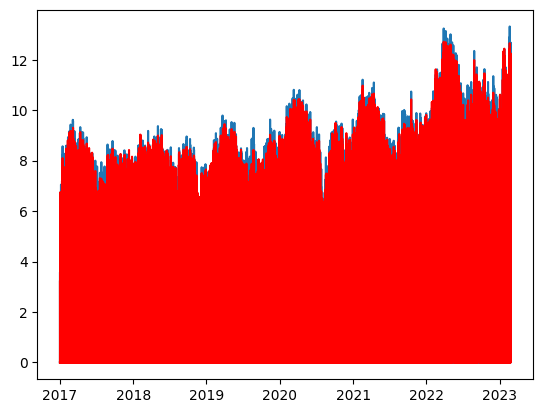

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '적설',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1491
[LightGBM] [Info] Number of data points in the train set: 28867, number of used features: 14
[LightGBM] [Info] Start training 

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clust

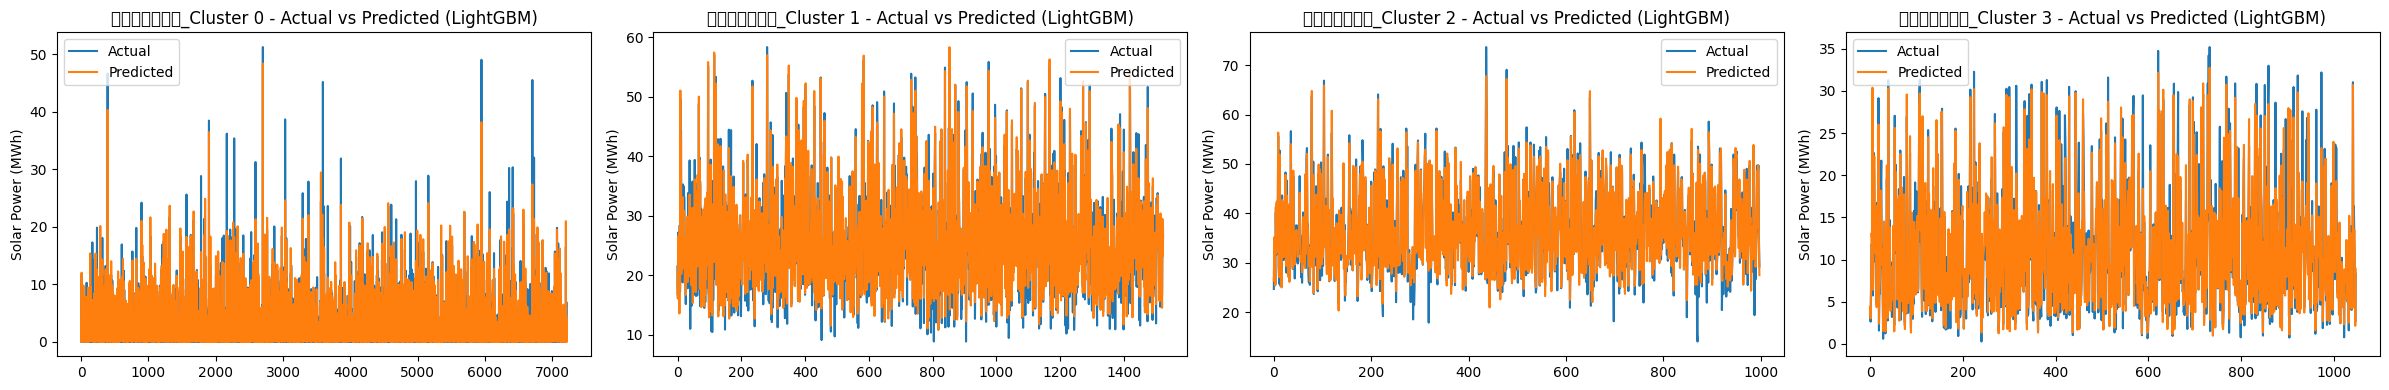

부산시_RMSE scores: [1.2704378533613423, 2.967332510669045, 2.45245012463985, 2.2780601501032685]
부산시_MAE scores: [0.6263050302709422, 2.0165147667086036, 1.6778445151748842, 1.4912013481379833]
부산시_SMAPE scores: [122.32516996462799, 8.780828514045282, 4.919706910269081, 15.853987269948119]
부산시_MAPE scores: [7.665083205125978e+17, 9.139998872471178, 5.098362934842181, 17.410910359096395]
부산시_Average RMSE: 2.2420701596933763
부산시_Average MAE: 1.4529664150731034
부산시_Average SMAPE: 37.96992316472261
부산시_Average MAPE: 1.9162708012814944e+17
부산시_Cluster 0 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
부산시_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
부산시_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
부산시_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '

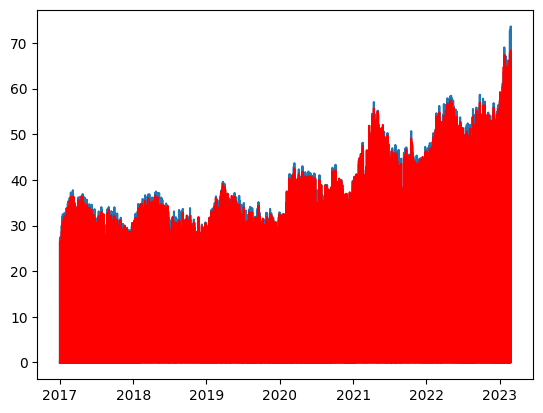

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 27933, number of used features: 12
[LightGBM] [Info] Start training from score 0.130872


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing r

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4450 (\N{HANGUL JUNGSEONG AE}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarnin

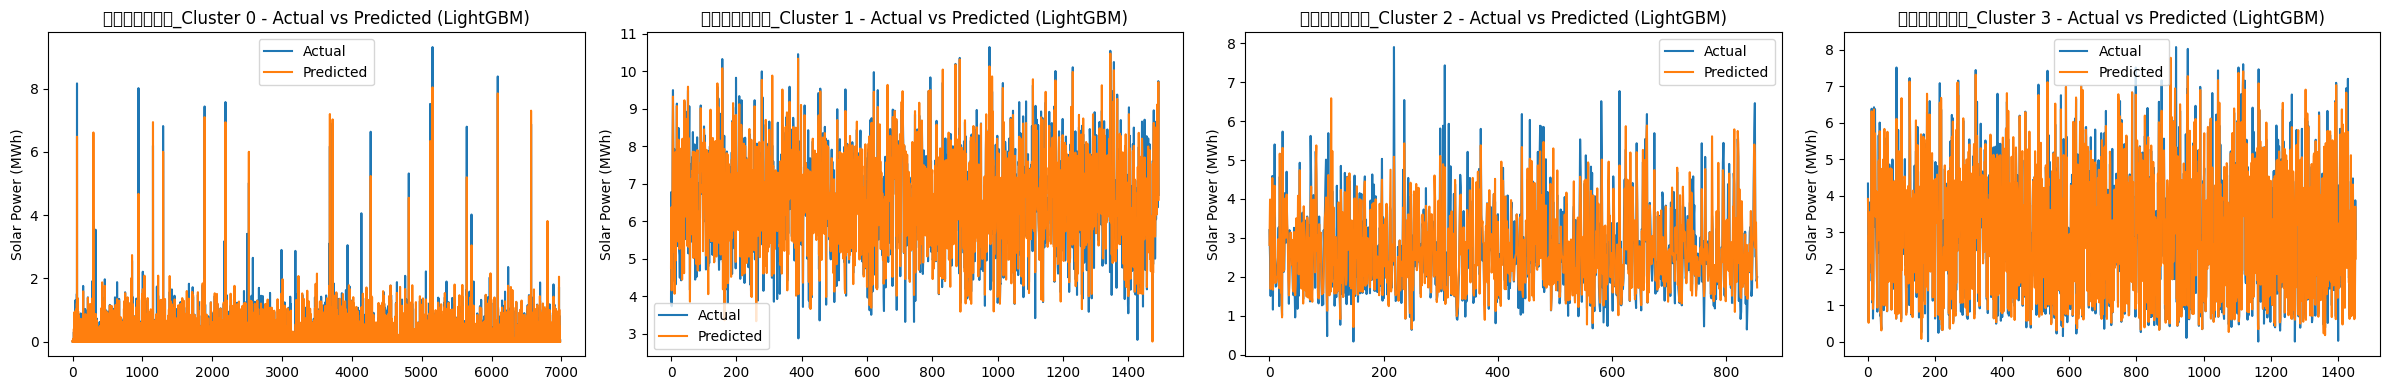

대전시_RMSE scores: [0.15932338283282851, 0.5024195682954802, 0.5535483825419975, 0.4586242775335769]
대전시_MAE scores: [0.04217304820258568, 0.35661273949048955, 0.3738490690304829, 0.2964015352025088]
대전시_SMAPE scores: [163.2406389033937, 5.845773694472083, 13.991117414746956, 11.97992575012508]
대전시_MAPE scores: [inf, 5.944128979458066, 14.904267839129762, 145196242632784.1]
대전시_Average RMSE: 0.4184789028009708
대전시_Average MAE: 0.2672590979815167
대전시_Average SMAPE: 48.764363940684454
대전시_Average MAPE: inf
대전시_Cluster 0 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
대전시_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
대전시_Cluster 2 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
대전시_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '

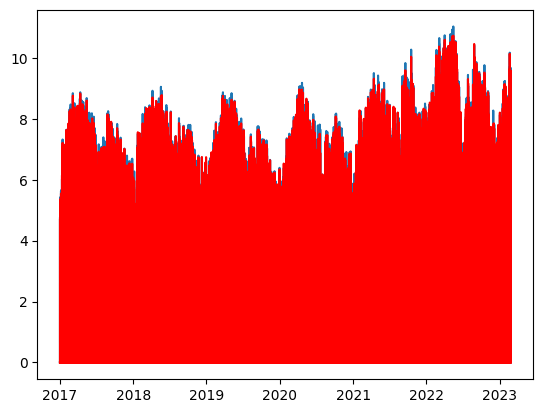

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 5915, number of used features: 11
[LightGBM] [Info] Start training from score 0.005356
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       '

<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')


<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning:

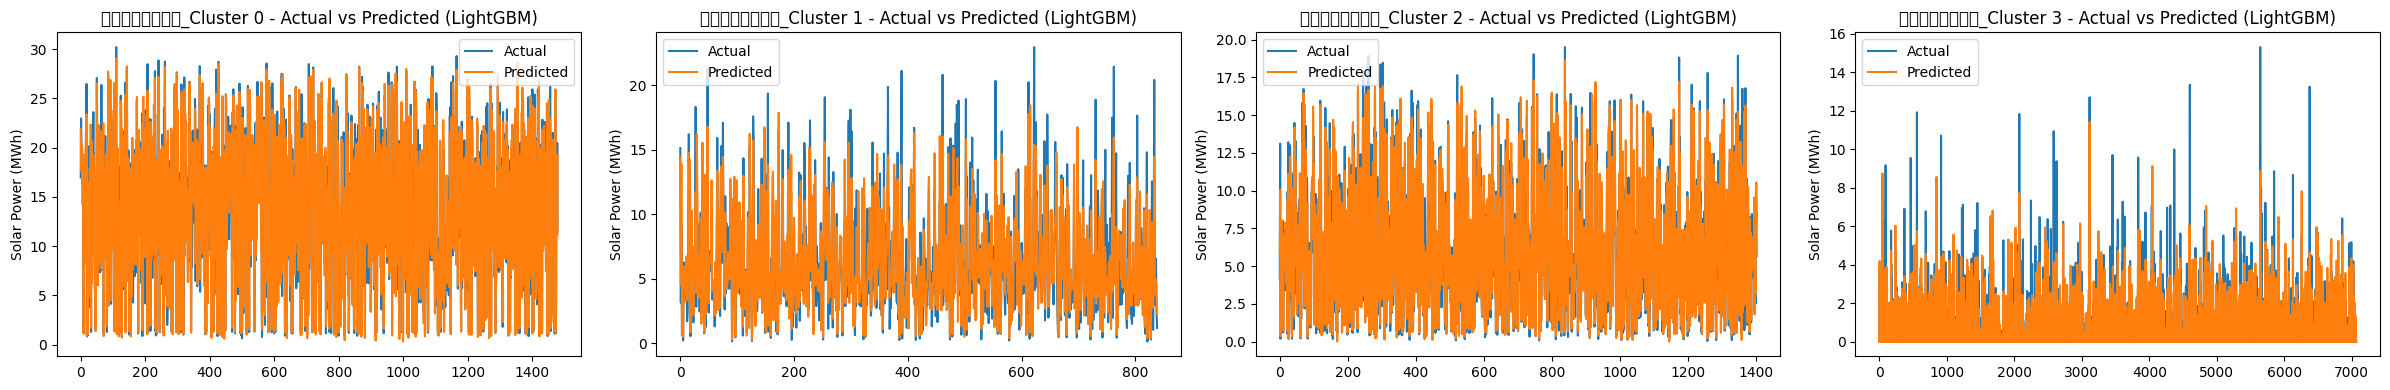

울산시_RMSE scores: [1.7002431028528255, 2.2483127494249056, 1.1277980022626384, 0.5304239538697039]
울산시_MAE scores: [1.1026573825291313, 1.637090361409832, 0.7370934509968082, 0.19000410923720962]
울산시_SMAPE scores: [10.559965070868701, 28.90337443572477, 16.51232470849239, 147.58745094385682]
울산시_MAPE scores: [11.173506317189014, 34.04448089294272, 18.90674764621956, inf]
울산시_Average RMSE: 1.4016944521025183
울산시_Average MAE: 0.9167113260432452
울산시_Average SMAPE: 50.89077878973567
울산시_Average MAPE: inf
울산시_Cluster 0 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
울산시_Cluster 1 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
울산시_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
울산시_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온

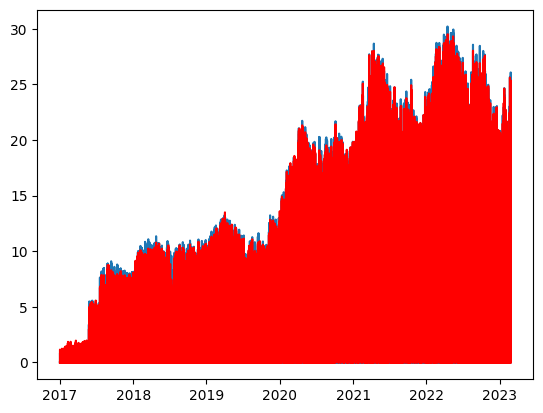

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 5993, number of used features: 12
[LightGBM] [Info] Start training from score 0.123280


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wi

<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choo

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4454 (\N{HANGUL JUNGSEONG E}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_cluste

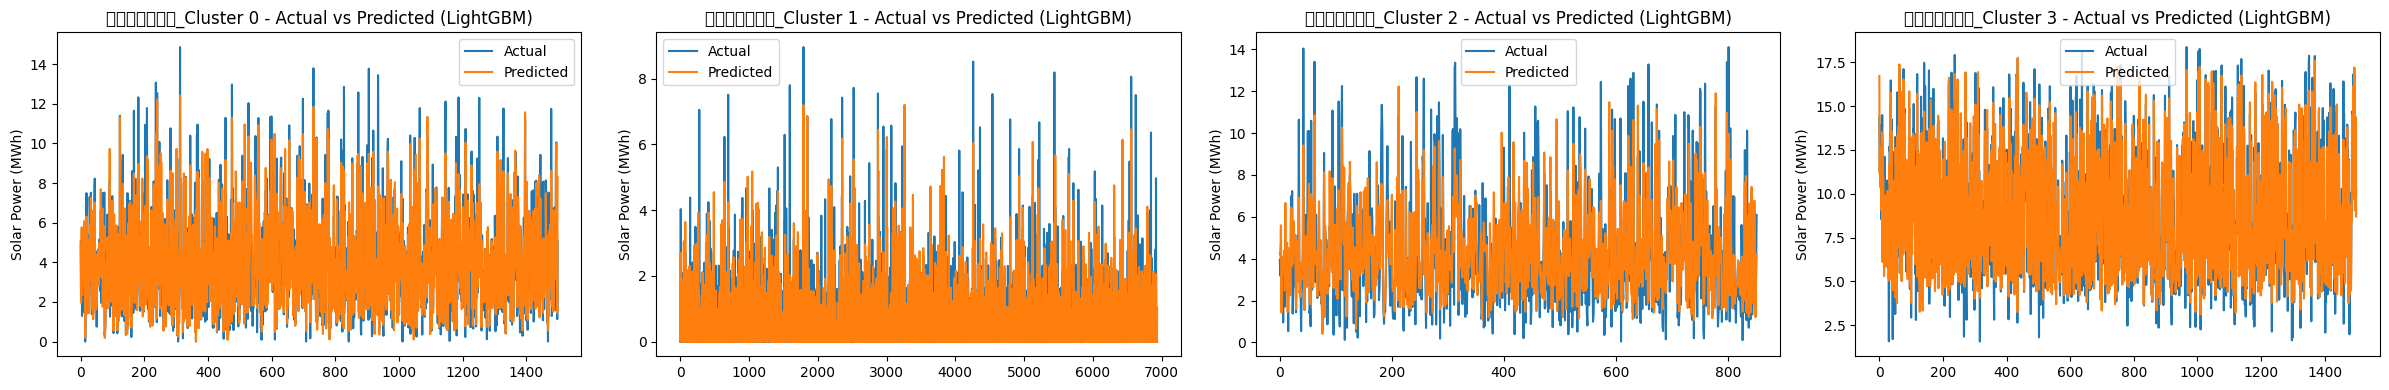

세종시_RMSE scores: [1.0996740669944307, 0.5125194147259008, 1.8172371502443003, 1.346711550204909]
세종시_MAE scores: [0.7529980282694321, 0.2775621256105531, 1.3871652335533033, 0.9650025230032434]
세종시_SMAPE scores: [23.064862706788748, 150.6179289215499, 36.96996905348776, 12.373224921153463]
세종시_MAPE scores: [inf, inf, 67.99058586368139, 13.693248015033472]
세종시_Average RMSE: 1.1940355455423852
세종시_Average MAE: 0.845681977609133
세종시_Average SMAPE: 55.756496400744965
세종시_Average MAPE: inf
세종시_Cluster 0 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
세종시_Cluster 1 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
세종시_Cluster 2 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
세종시_Cluster 3 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date

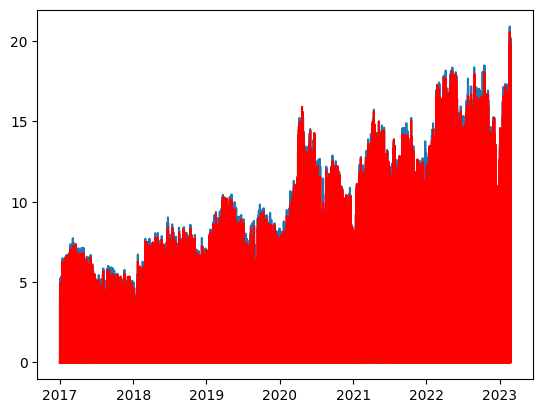

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', 'Cluster',
       'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1693
[LightGBM] [Info] Number of data points in the train set: 29332, number of used features: 13
[LightGBM] [Info] Start training from score 0.79805

<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', 'Cluster',
       'year', 'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 cand

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4357 (\N{HANGUL CHOSEONG RIEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4354 (\N{HANGUL CHOSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4535 (\N{HANGUL JONGSEONG MIEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWar

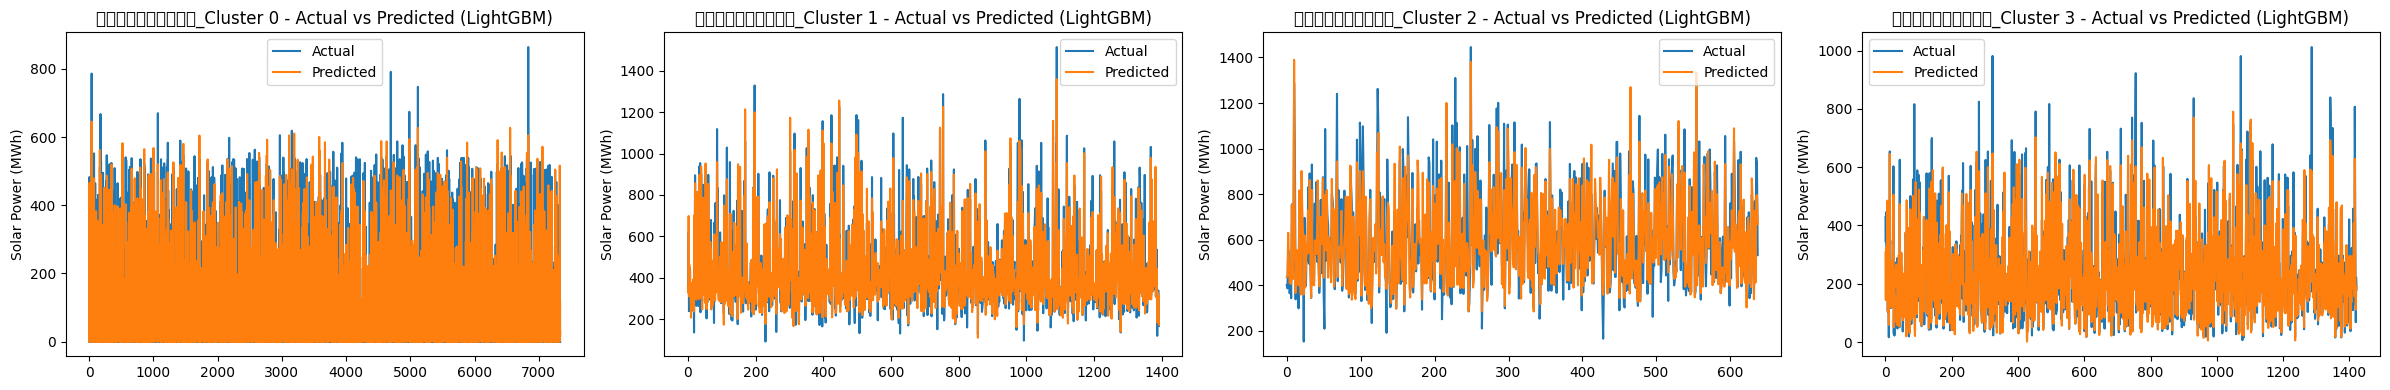

전라남도_RMSE scores: [70.95997328355031, 78.58395337304543, 110.42988152123486, 71.13183145892417]
전라남도_MAE scores: [39.68999714543644, 51.42521768531656, 78.8862683531686, 46.20810568736072]
전라남도_SMAPE scores: [121.55525024728739, 11.96515362462129, 13.028780060243234, 21.118602946183675]
전라남도_MAPE scores: [inf, 12.65043351388866, 13.674049788652873, 24.06538897919281]
전라남도_Average RMSE: 82.7764099091887
전라남도_Average MAE: 54.052397217820584
전라남도_Average SMAPE: 41.9169467195839
전라남도_Average MAPE: inf
전라남도_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
전라남도_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
전라남도_Cluster 2 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
전라남도_Cluster 3 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지

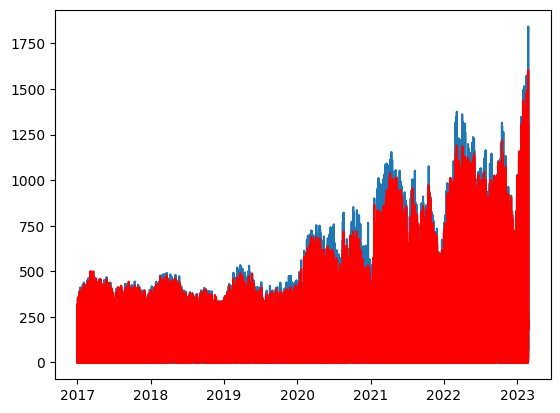

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 28425, number of used features: 11
[LightGBM] [Info] Start training from score 0.567042


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-t

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4366 (\N{HANGUL CHOSEONG CHIEUCH}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}

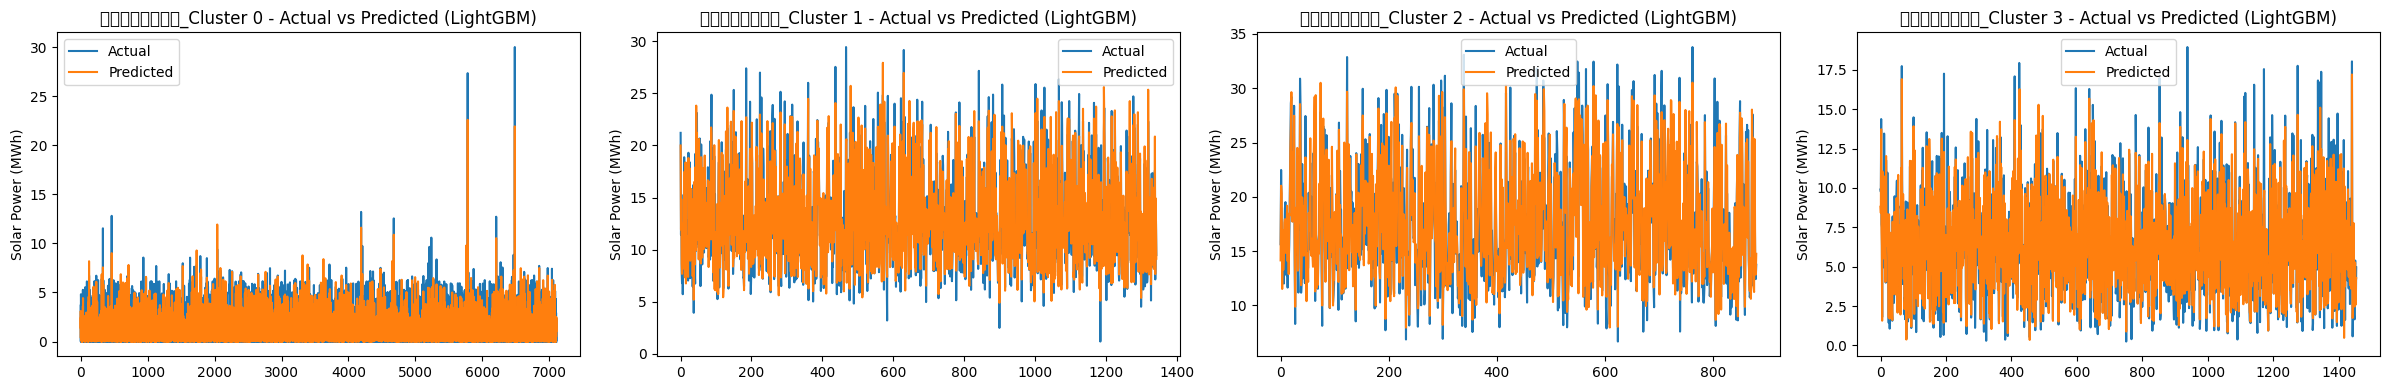

인천시_RMSE scores: [1.3714359231600775, 1.7871716206899027, 2.1486387598294985, 1.378960841418554]
인천시_MAE scores: [0.9172650292855283, 1.338115890701968, 1.6865978170533713, 0.9747451802059353]
인천시_SMAPE scores: [131.86183557642727, 10.646432504699535, 9.683066812751976, 17.492905844800173]
인천시_MAPE scores: [inf, 11.183686256848146, 9.9739235669054, 22.405901578985905]
인천시_Average RMSE: 1.6715517862745082
인천시_Average MAE: 1.2291809793117006
인천시_Average SMAPE: 42.421060184669734
인천시_Average MAPE: inf
인천시_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
인천시_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
인천시_Cluster 2 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
인천시_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.1}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층

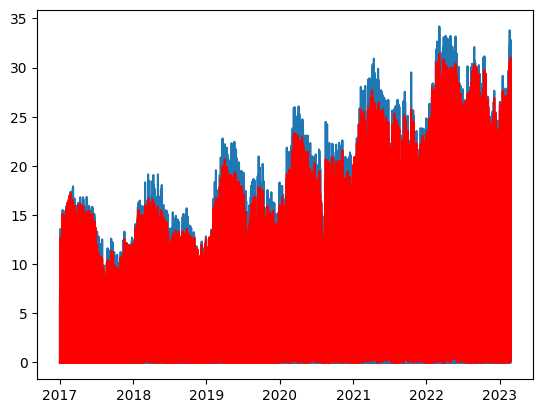

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 27933, number of used features: 11
[LightGBM] [Info] Start training from score 0.703554


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhe

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4357 (\N{HANGUL CHOSEONG RIEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning

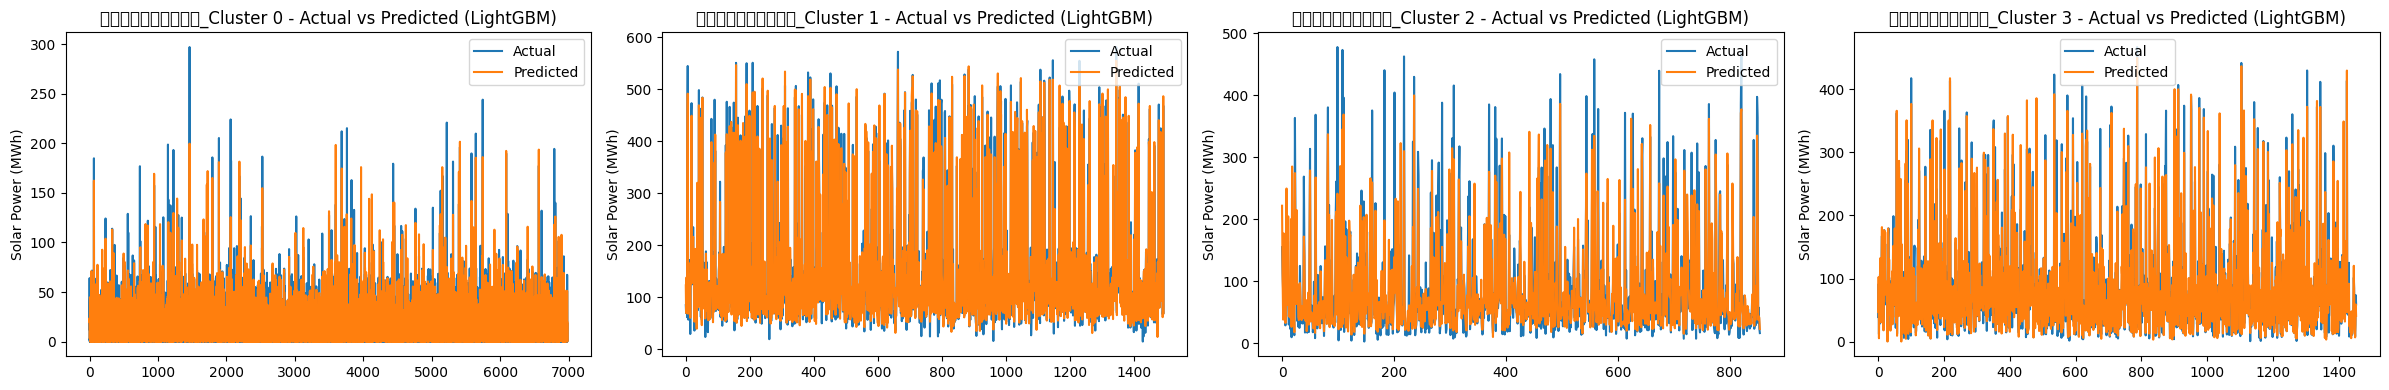

전라북도_RMSE scores: [12.280980223039025, 26.100857990181833, 42.36806144296556, 23.484960282054708]
전라북도_MAE scores: [6.923150704546456, 16.722646072545007, 26.31728520246212, 14.721760060307844]
전라북도_SMAPE scores: [120.60795356004266, 12.212061695491027, 32.33700649809828, 21.768957150341777]
전라북도_MAPE scores: [inf, 13.604519311464077, 39.202974573890764, 28.157723503207453]
전라북도_Average RMSE: 26.058714984560282
전라북도_Average MAE: 16.171210509965356
전라북도_Average SMAPE: 46.731494725993436
전라북도_Average MAPE: inf
전라북도_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
전라북도_Cluster 1 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
전라북도_Cluster 2 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
전라북도_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 500, 'learning_rate': 0.1}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조'

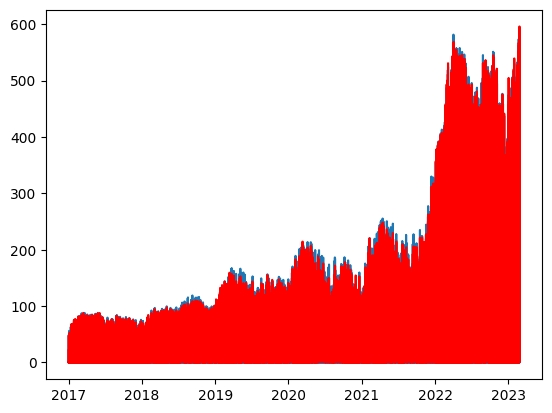

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 5298, number of used features: 12
[LightGBM] [Info] Start training from score 0.117657
마지막으로 모델 다 돌린 후 cluster
In

<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4366 (\N{HANGUL CHOSEONG CHIEUCH}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4354 (\N{HANGUL CHOSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4535 (\N{HANGUL JONGSEONG MIEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarn

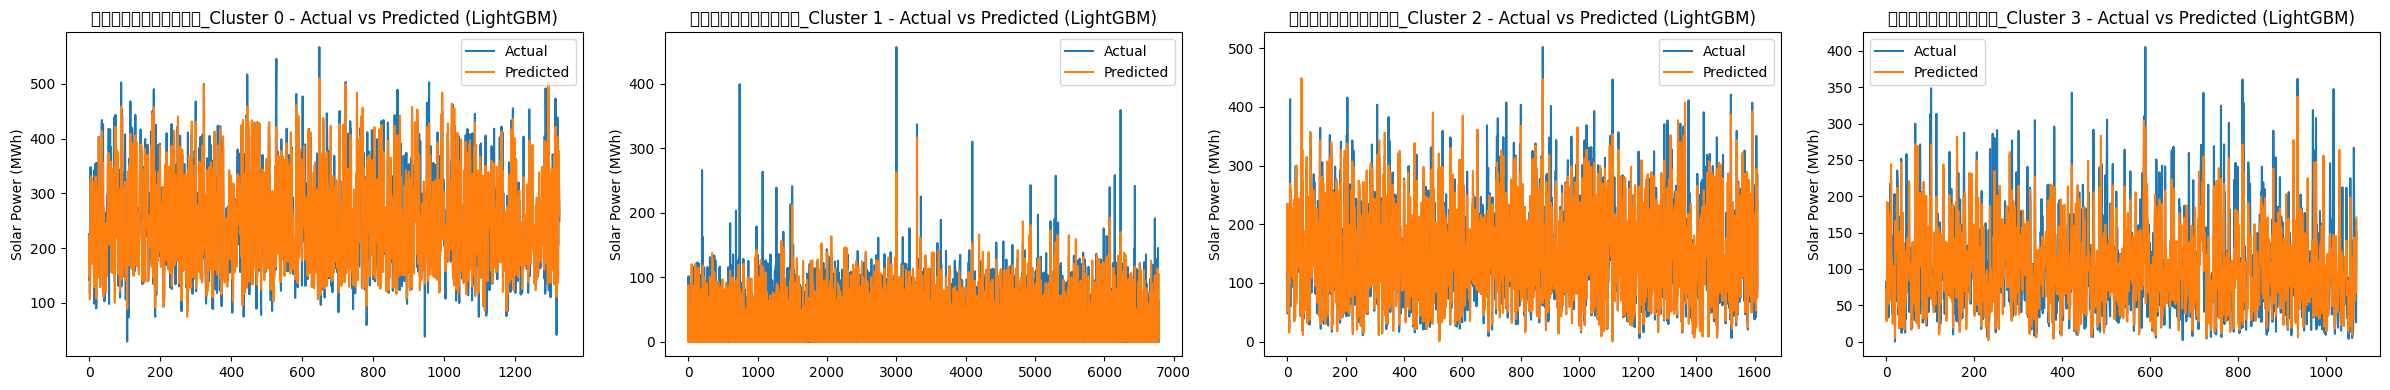

충청남도_RMSE scores: [35.13395973273987, 19.38714861903242, 33.51233116782483, 40.33493827530105]
충청남도_MAE scores: [24.783143834462503, 10.479511359338545, 22.762875811702074, 29.41565266039197]
충청남도_SMAPE scores: [10.586254280040658, 131.66895312618487, 17.161274361745164, 32.816812522944005]
충청남도_MAPE scores: [11.499924834907322, inf, 19.560243678199146, 47.84432072887909]
충청남도_Average RMSE: 32.092094448724545
충청남도_Average MAE: 21.860295916473774
충청남도_Average SMAPE: 48.05832357272868
충청남도_Average MAPE: inf
충청남도_Cluster 0 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
충청남도_Cluster 1 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
충청남도_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
충청남도_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', 

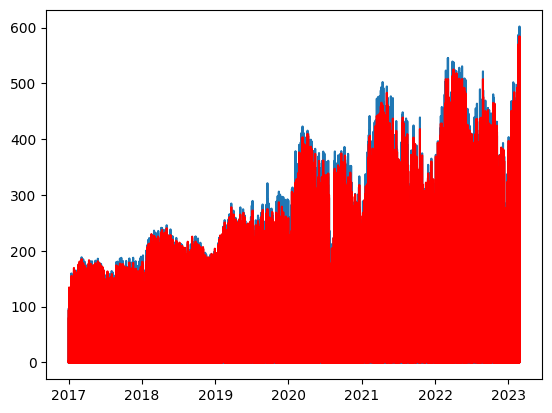

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'Cluster', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 29895, number of used features: 10
[LightGBM] [Info] Start training from score 1.220274
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4454 (\N{HANGUL JUNGSEONG E}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clusters_prediction.png')
<ipython-input-11-060b5d44cf11>:161: UserWarning: Glyph 4454 (\N{HANGUL JUNGSEONG E}) missing from current font.
  

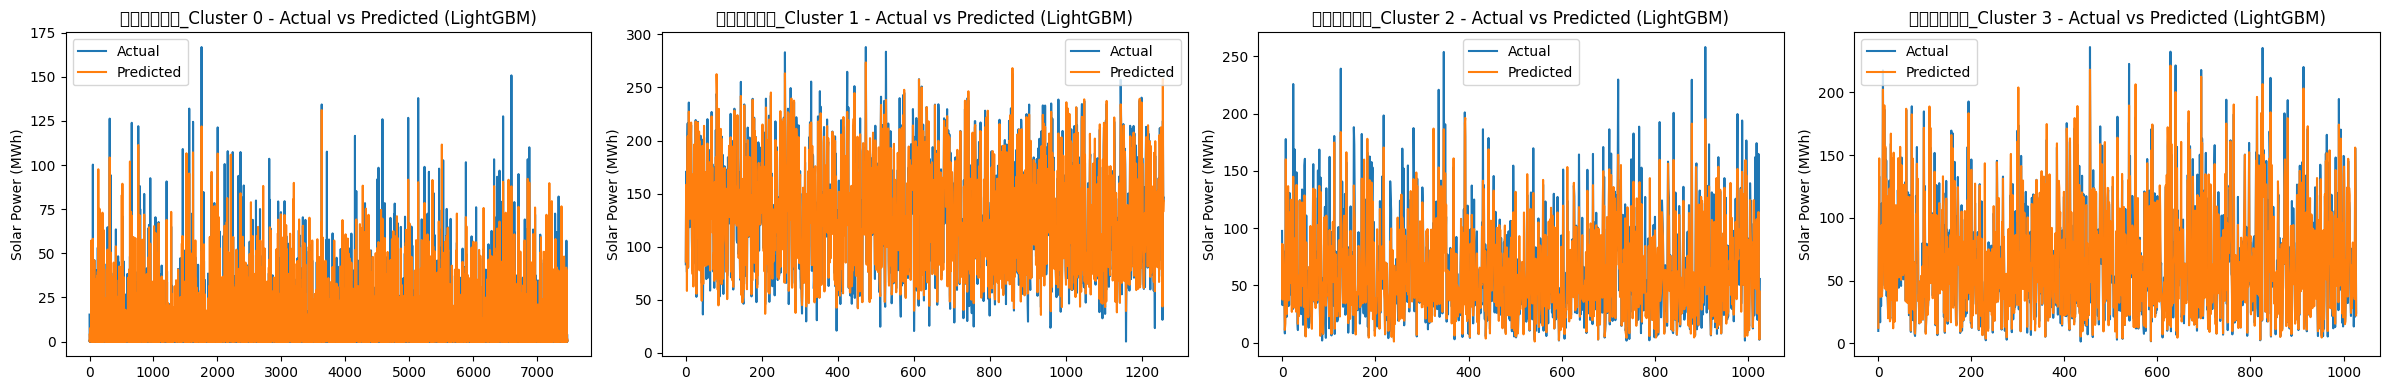

제주도_RMSE scores: [6.25790360476727, 16.069428777055368, 19.685492512489784, 12.429697756305414]
제주도_MAE scores: [2.6029737492868827, 11.311782962557738, 14.019172537547824, 8.082770201829454]
제주도_SMAPE scores: [124.01952173967976, 10.071190101284728, 25.303601432110572, 13.938796103986553]
제주도_MAPE scores: [5.096332556401562e+17, 10.883299932902379, 30.752319078658726, 15.715196270594758]
제주도_Average RMSE: 13.610630662654458
제주도_Average MAE: 9.004174862805474
제주도_Average SMAPE: 43.33327734426541
제주도_Average MAPE: 1.2740831391003906e+17
제주도_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
제주도_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
제주도_Cluster 2 Best Params: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.05}
제주도_Cluster 3 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면

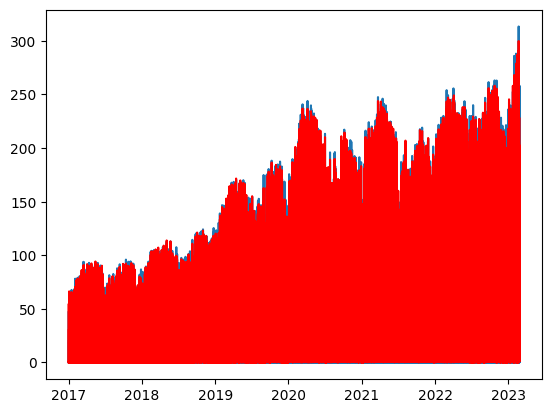

<ipython-input-11-060b5d44cf11>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date'],
      dtype='object')


<ipython-input-11-060b5d44cf11>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_
<ipython-input-11-060b5d44cf11>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['date'].dt.year
<ipython-input-11-060b5d44cf11>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 27933, number of used features: 12
[LightGBM] [Info] Start training from score 0.761535


<ipython-input-11-060b5d44cf11>:21: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')
Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-11-060b5d44cf11>:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['Cluster'] == cluster, 'predict'] = cluster_predict


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 5976, number of used features: 12
[LightGBM] [Info] Start training from score 0.173705
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(

<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4366 (\N{HANGUL CHOSEONG CHIEUCH}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4520 (\N{HANGUL JONGSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-11-060b5d44cf11>:160: Use

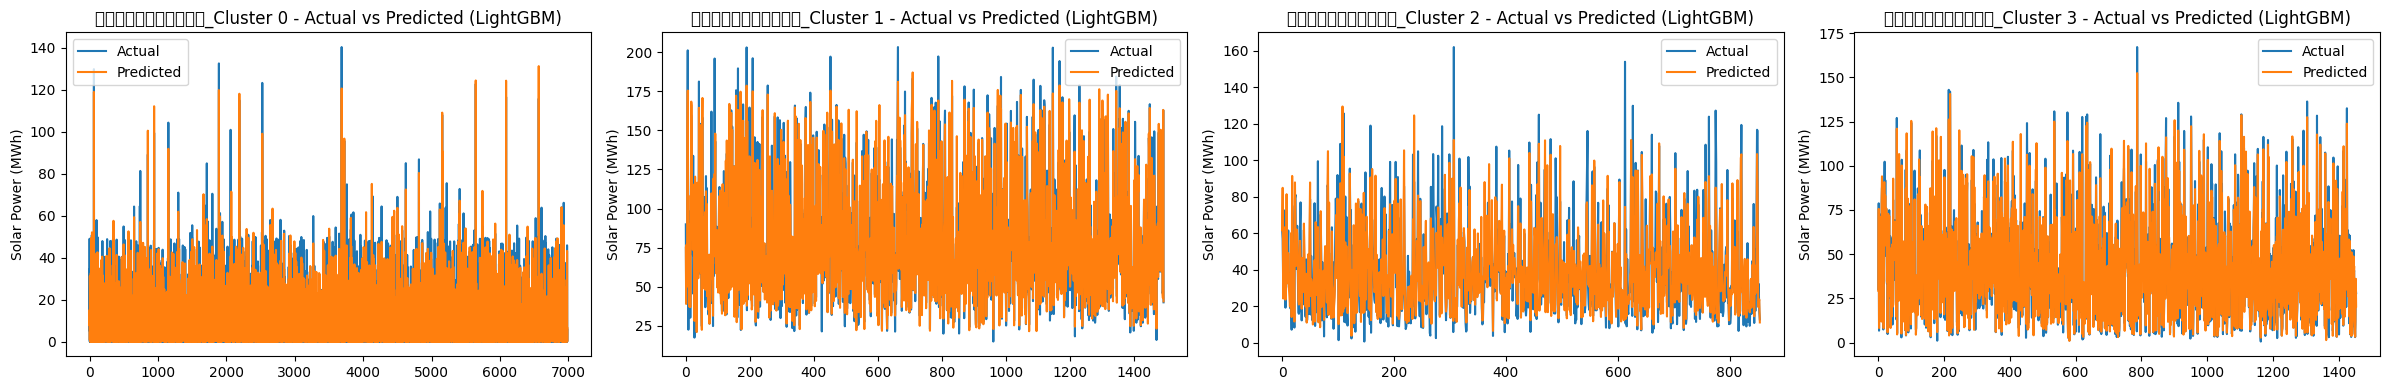

충청북도_RMSE scores: [6.58011153972831, 11.530064179704867, 13.683513839545236, 8.558543379368711]
충청북도_MAE scores: [3.7026364219436667, 7.62327733430045, 9.598481115727935, 5.9643204233356455]
충청북도_SMAPE scores: [120.82202316610386, 9.97655056372716, 26.402864267315234, 16.95373633482294]
충청북도_MAPE scores: [inf, 10.486671252035308, 34.51130140544169, 19.945694249102374]
충청북도_Average RMSE: 10.088058234586782
충청북도_Average MAE: 6.722178823826924
충청북도_Average SMAPE: 43.5387935829923
충청북도_Average MAPE: inf
충청북도_Cluster 0 Best Params: {'num_leaves': 70, 'n_estimators': 500, 'learning_rate': 0.05}
충청북도_Cluster 1 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
충청북도_Cluster 2 Best Params: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.05}
충청북도_Cluster 3 Best Params: {'num_leaves': 50, 'n_estimators': 500, 'learning_rate': 0.05}
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', 

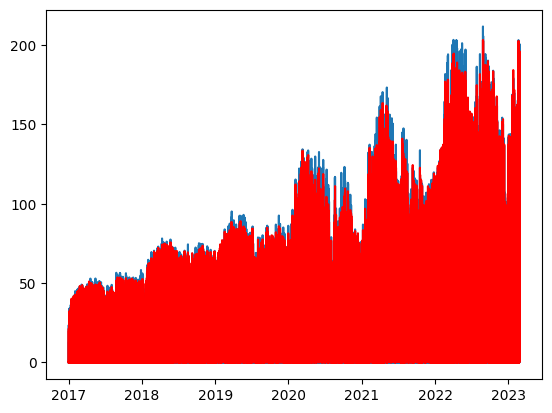

In [ ]:
from math import e
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor
from joblib import dump
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.font_manager as font_manager

def smape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# 데이터 로드 및 전처리

for data, name in zip(new_no_null_df, names):
    data['date'] = pd.to_datetime(data['date'])
    print("데이터 로드 및 전처리")
    print(data.columns)


    # 최적의 군집 수 설정 (엘보우 그래프 참고)
    optimal_clusters = 4

    # 데이터 스케일링 및 KMeans 클러스터링
    scaler = RobustScaler()
    # data_scaled = scaler.fit_transform(data.drop('시간',axis=1))
    data_scaled = scaler.fit_transform(data[["일사","일조"]])
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(data_scaled)
    data['Cluster'] = kmeans.labels_

    # KMeans 모델 저장
    dump(kmeans, f'/content/drive/MyDrive/new_model/kmeans/kmeans_model_{name}.joblib')

    # Sample parameter grid for RandomizedSearchCV
    param_grid = {
        'num_leaves': [31, 50, 70],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 500]
    }

    rmse_scores = []
    mae_scores = []
    smape_scores = []
    mape_scores = []
    best_params_list = []  # 각 클러스터의 최적 하이퍼파라미터 저장

    fig, axes = plt.subplots(1, optimal_clusters, figsize=(6 * optimal_clusters, 4))

    # 예측값을 저장할 빈 리스트 생성
    predict_list=[0]*len(data)
    # 날짜 피처 생성
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek

    # 과거 값 (lag) 피처 생성
    # data['lag_1'] = data['Solar_Power(MWh)'].shift(1)
    # data['lag_2'] = data['Solar_Power(MWh)'].shift(2)
    # data['lag_72'] = data['Solar_Power(MWh)'].shift(72)
    # data['rolling_mean'] = data['Solar_Power(MWh)'].rolling(window=3).mean()
    # data['rolling_mean'] = data['Solar_Power(MWh)'].rolling(window=72).mean()
    print("과거 값 피처 생성후 ")
    print(data.columns)

    for cluster in np.unique(data['Cluster']):
        cluster_data = data[data['Cluster'] == cluster].reset_index(drop=True)
        print("클러스터 라벨 붙인 후 ")
        print(cluster_data.columns)
        if "predict" in cluster_data.columns:
            cluster_data.drop("predict",axis=1,inplace=True)
        else:
          pass
        # LightGBM 모델
        X_lightgbm = cluster_data.drop(columns=['Solar_Power(MWh)', 'date'])
        y_lightgbm = cluster_data['Solar_Power(MWh)'].values.reshape(-1, 1)
        print("lightgbm모델 돌리기 전")
        print(X_lightgbm.columns)
        scaler_X = RobustScaler()
        scaler_y = RobustScaler()

        X_lightgbm_scaled = scaler_X.fit_transform(X_lightgbm)
        y_lightgbm_scaled = scaler_y.fit_transform(y_lightgbm)

        X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_lightgbm_scaled, y_lightgbm_scaled, test_size=0.2, random_state=42)

        model = LGBMRegressor(random_state=42)

        # RandomizedSearchCV를 사용하여 하이퍼파라미터 튜닝
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

        random_search.fit(X_train_lgb, y_train_lgb.ravel())

        best_model = random_search.best_estimator_

        # 최적 하이퍼파라미터 저장
        best_params_list.append(random_search.best_params_)

        # 모델 저장
        dump(best_model, f'/content/drive/MyDrive/new_model/lightgbm/lightgbm_cluster_{cluster}_{name}.joblib')

        # 예측
        y_pred_lgb = best_model.predict(X_test_lgb)

        # 예측값을 원래 스케일로 복원
        y_test_orig = scaler_y.inverse_transform(y_test_lgb)
        y_pred_lgb_original = scaler_y.inverse_transform(y_pred_lgb.reshape(-1, 1))

        # 0 미만의 예측 값을 0으로 처리
        y_pred_lgb_original = np.maximum(0, y_pred_lgb_original)

        rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_lgb_original))
        mae = mean_absolute_error(y_test_orig, y_pred_lgb_original)
        smape_val = smape(y_test_orig, y_pred_lgb_original)
        mape_val = mape(y_test_orig, y_pred_lgb_original)

        rmse_scores.append(rmse)
        mae_scores.append(mae)
        smape_scores.append(smape_val)
        mape_scores.append(mape_val)

        axes[cluster].plot(y_test_orig, label='Actual')
        axes[cluster].plot(y_pred_lgb_original, label='Predicted')
        axes[cluster].set_title(f'{name}_Cluster {cluster} - Actual vs Predicted (LightGBM)')
        axes[cluster].set_ylabel('Solar Power (MWh)')
        axes[cluster].legend()

        # 클러스터 전체 데이터 예측 및 원래 스케일로 복원
        cluster_predict_scaled = best_model.predict(scaler_X.transform(cluster_data.drop(columns=['Solar_Power(MWh)', 'date'])))
        cluster_predict = scaler_y.inverse_transform(cluster_predict_scaled.reshape(-1, 1))

        # 0 미만의 예측 값을 0으로 처리
        cluster_predict = np.maximum(0, cluster_predict)

        predict_list.append(cluster_predict)

        print("마지막으로 모델 다 돌린 후 cluster")
        print(cluster_data.columns)


        print("마지막으로 모델 다 돌린 후 data")
        print(data.columns)

        # 예측값을 데이터프레임에 추가
        data.loc[data['Cluster'] == cluster, 'predict'] = cluster_predict
        print("예측값을 데이터프레임에 추가")
        print(data.columns)


    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clusters_prediction.png')
    plt.show()


    print(f"{name}_RMSE scores:", rmse_scores)
    print(f"{name}_MAE scores:", mae_scores)
    print(f"{name}_SMAPE scores:", smape_scores)
    print(f"{name}_MAPE scores:", mape_scores)
    print(f"{name}_Average RMSE:", np.mean(rmse_scores))
    print(f"{name}_Average MAE:", np.mean(mae_scores))
    print(f"{name}_Average SMAPE:", np.mean(smape_scores))
    print(f"{name}_Average MAPE:", np.mean(mape_scores))


    # 각 클러스터의 최적 하이퍼파라미터 출력
    for cluster, params in enumerate(best_params_list):
        print(f"{name}_Cluster {cluster} Best Params:", params)
    print("모델 돌린 후 최종 칼럼")
    print(data.columns)

    # 예측 결과 데이터프레임 리스트에 추가
    # predict_asemble_data.append(data)
    data.to_csv(f"/content/drive/MyDrive/new_model/predicted_data/predicted_concat_data_{name}.csv")
    plt.plot(data["date"], data["Solar_Power(MWh)"],data["date"],data["predict"] , 'r-')

    plt.show()


In [ ]:
 ### Test 해보기

In [ ]:
import joblib

In [ ]:
test_df[0]

Solar_Power(MWh)    일사   일조    습도  지면온도      시정    기온  중하층운량   풍속  \
53927              4.30  0.00  0.0  87.0  -2.5  2677.0  -9.8    0.0  0.3   
53928              1.78  0.00  0.0  88.0  -3.3  2227.0 -10.8    0.0  0.0   
53929              0.39  0.00  0.0  89.0  -3.8  2598.0 -10.7    0.0  0.9   
53930              0.00  0.00  0.0  85.0  -4.5  3469.0 -10.9    0.0  0.0   
53931              0.00  0.00  0.0  87.0  -5.1  2661.0 -12.2    0.0  0.5   
...                 ...   ...  ...   ...   ...     ...   ...    ...  ...   
53994             54.75  0.01  0.0  38.0  -0.4  4128.0   3.4    0.0  6.6   
53995             74.80  0.00  0.0  55.0  -0.5  2925.0   2.5    0.0  5.2   
53996             73.18  0.00  0.0  67.0  -0.7  2208.0   1.7    0.0  4.9   
53997             49.00  0.00  0.0  76.0  -0.7  2009.0   1.2    0.0  5.9   
53998             19.37  0.00  0.0  77.0  -0.5  2256.0   1.2    7.0  4.6   

                     date  
53927 2023-02-26 00:00:00  
53928 2023-02-26 01:00:00  
53929 2023-02-26 02:00:00  
53930 2023-02-26 03:00:00  
53931 2023-02-26 04:00:00  
...                   ...  
53994 2023-02-28 19:00:00  
53995 2023-02-28 20:00:00  
53996 2023-02-28 21:00:00  
53997 2023-02-28 22:00:00  
53998 2023-02-28 23:00:00  

[72 rows x 10 columns]

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'd

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/


Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()



Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4463 (\N{HANGUL JUNGSEONG WEO}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:124: UserWarn

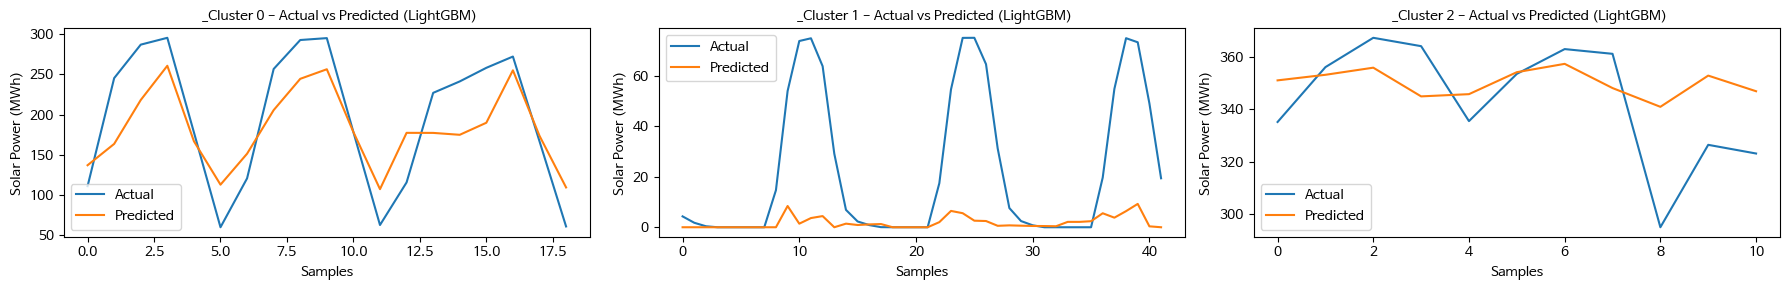

강원도_RMSE scores: [47.928620138580506, 34.065371990599544, 20.023946273438654]
강원도_MAE scores: [42.49105351881826, 21.108366120676017, 15.867251346041696]
강원도_SMAPE scores: [26.01858648078812, 174.15306754442437, 4.691926079944826]
강원도_MAPE scores: [29.0891302639745, inf, 4.834860680785629]
강원도_Average RMSE: 34.00597946753957
강원도_Average MAE: 26.48889032851199
강원도_Average SMAPE: 68.28786003505245
강원도_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


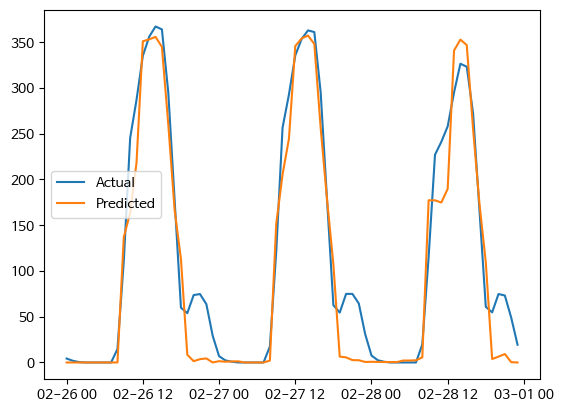

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_m

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
<

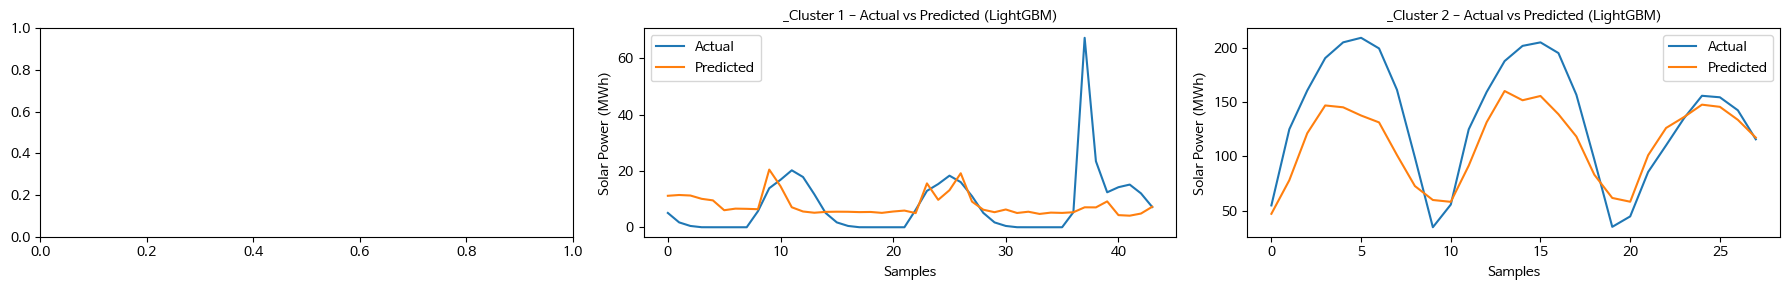

경기도_RMSE scores: [11.284323572800542, 36.91268329129603]
경기도_MAE scores: [6.987774476629299, 30.331288195448856]
경기도_SMAPE scores: [115.57787852083344, 24.864048251503043]
경기도_MAPE scores: [inf, 23.97874375301508]
경기도_Average RMSE: 24.098503432048282
경기도_Average MAE: 18.659531336039077
경기도_Average SMAPE: 70.22096338616824
경기도_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


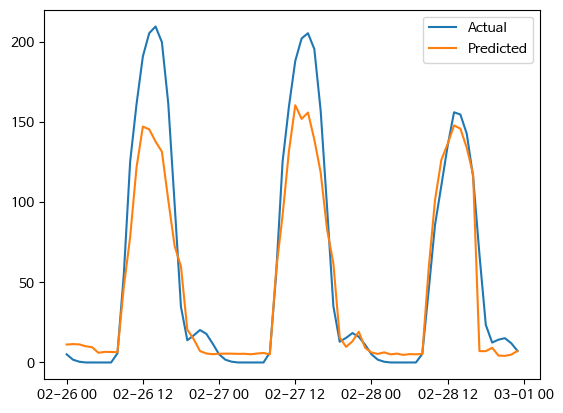

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '적설',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

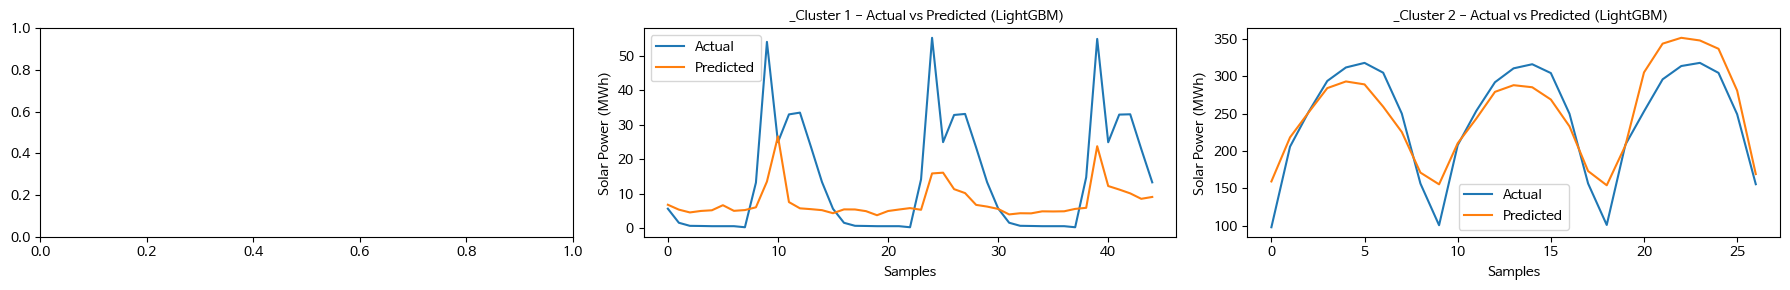

경상남도_RMSE scores: [14.429028024878711, 31.600263066747658]
경상남도_MAE scores: [10.300920379109748, 26.589090252562762]
경상남도_SMAPE scores: [113.17754635953192, 12.37386343210534]
경상남도_MAPE scores: [402.6056007037378, 13.856464047722122]
경상남도_Average RMSE: 23.014645545813185
경상남도_Average MAE: 18.445005315836255
경상남도_Average SMAPE: 62.77570489581863
경상남도_Average MAPE: 208.23103237572997
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')


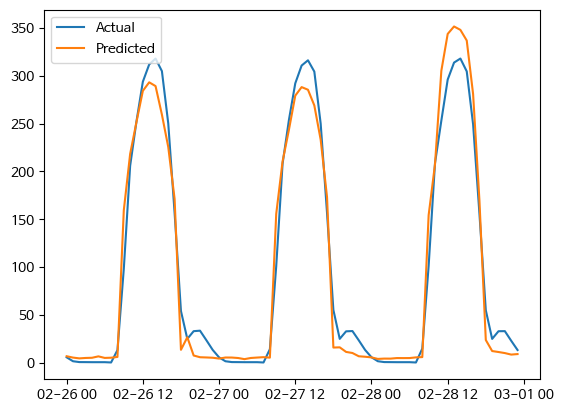

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', '풍향', 'Cluster',
       'year', 'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster',

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
<

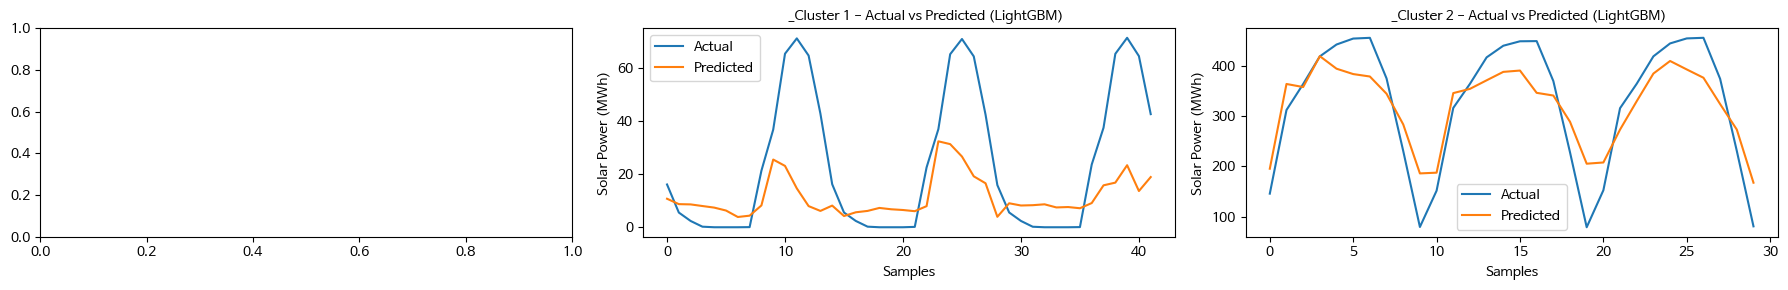

경상북도_RMSE scores: [24.537632054020957, 59.43407141513135]
경상북도_MAE scores: [17.614611660726826, 52.32208954959583]
경상북도_SMAPE scores: [126.70086249755552, 20.903550369011047]
경상북도_MAPE scores: [inf, 26.576049714828027]
경상북도_Average RMSE: 41.98585173457615
경상북도_Average MAE: 34.968350605161326
경상북도_Average SMAPE: 73.80220643328329
경상북도_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


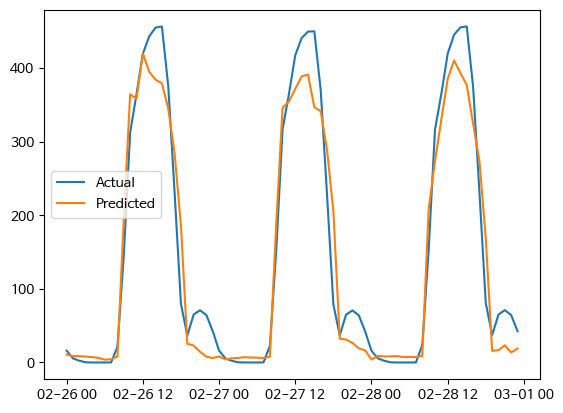

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '풍향',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
<

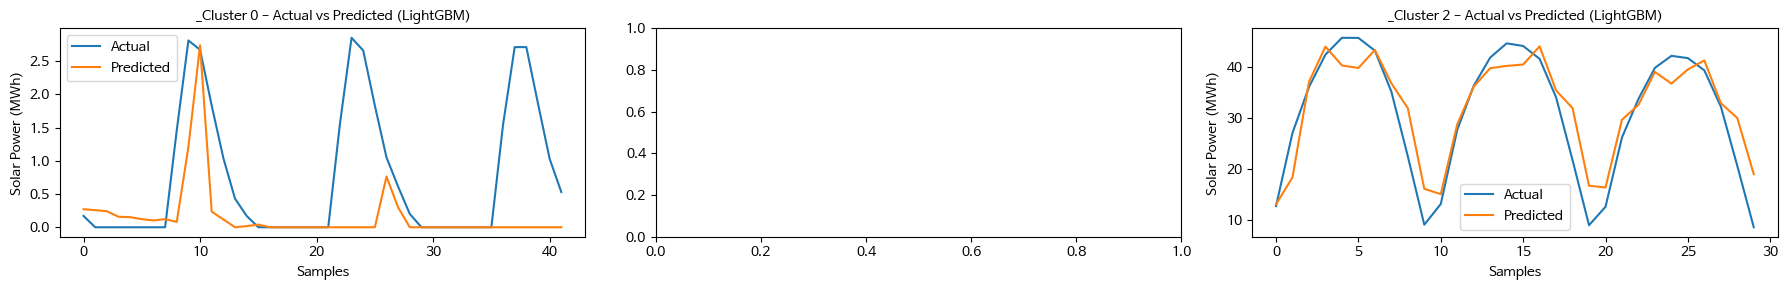

광주시_RMSE scores: [1.1055080919760214, 5.05794986541286]
광주시_MAE scores: [0.6551120514896418, 3.863048399593347]
광주시_SMAPE scores: [178.22945502227583, 16.771971186927892]
광주시_MAPE scores: [inf, 20.62486845668731]
광주시_Average RMSE: 3.081728978694441
광주시_Average MAE: 2.2590802255414943
광주시_Average SMAPE: 97.50071310460186
광주시_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '풍향', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')


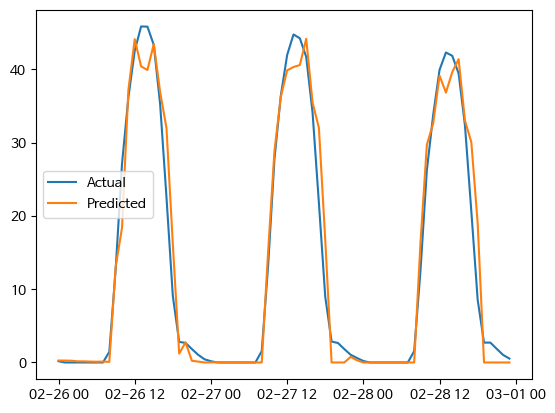

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayo

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4450 (\N{HANGUL JUNGSEONG AE}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:124: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_cl

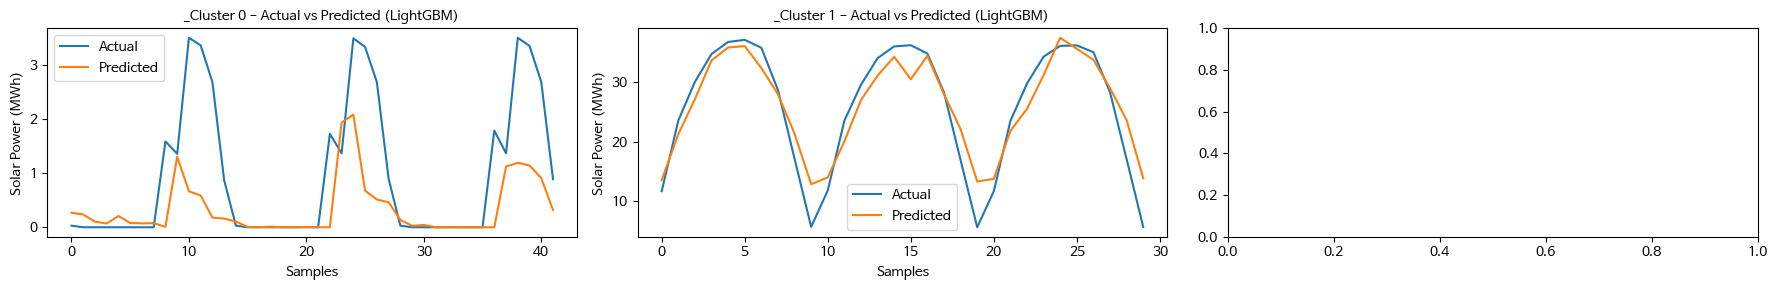

대구시_RMSE scores: [1.1923941052922837, 3.6913479048538953]
대구시_MAE scores: [0.7083734336092602, 2.9310550316246604]
대구시_SMAPE scores: [157.62384035431833, 17.271547223647204]
대구시_MAPE scores: [1.2884007515720645e+18, 23.26551326160595]
대구시_Average RMSE: 2.4418710050730894
대구시_Average MAE: 1.8197142326169602
대구시_Average SMAPE: 87.44769378898278
대구시_Average MAPE: 6.442003757860323e+17
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', '전운량', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


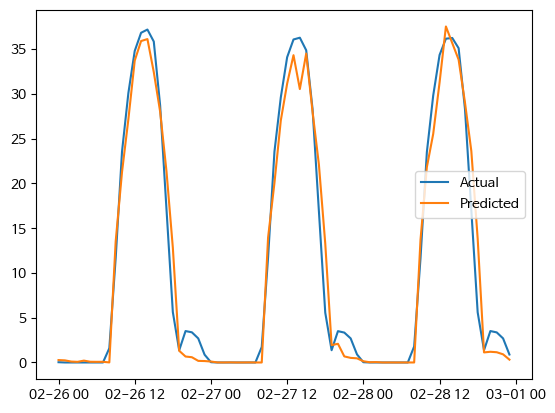

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '기온', '풍속', 'Cluster', 'year', 'month', 'day',
       'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 data
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
예측값을 데이터프레임에 추가
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '기온', '풍속', 'Cluster', 'year', 'month', 'day',
       'dayofweek', 'lag_72', 'rolling_mean'],
      dtype=

<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:124: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clust

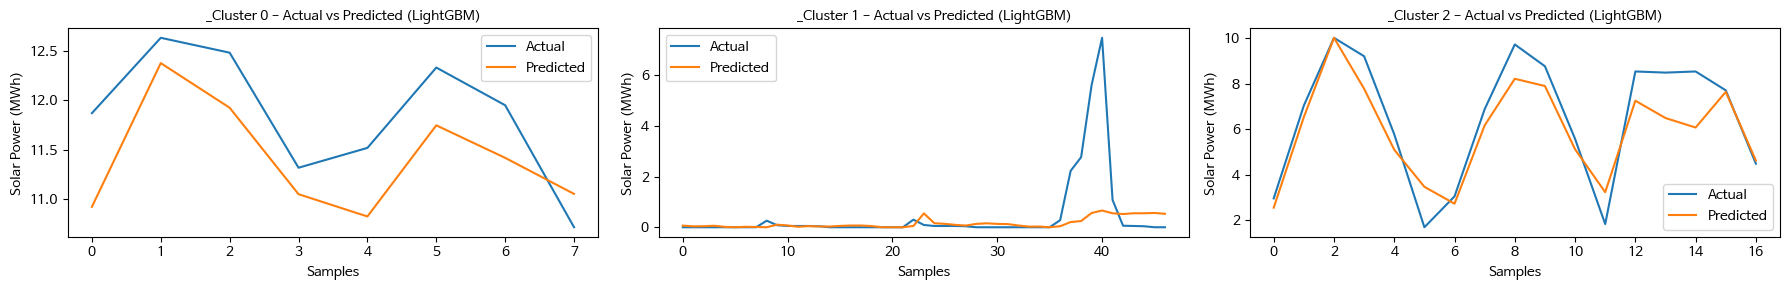

서울시_RMSE scores: [0.564249821864186, 1.3432727447154607, 1.1809616039465058]
서울시_MAE scores: [0.5201448394038388, 0.47393179560178206, 0.9438522628648597]
서울시_SMAPE scores: [4.488317197568799, 160.80661901289702, 18.543112438581417]
서울시_MAPE scores: [4.384381102446913, inf, 21.02841328187585]
서울시_Average RMSE: 1.0294947235087175
서울시_Average MAE: 0.6459762992901602
서울시_Average SMAPE: 61.2793495496824
서울시_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


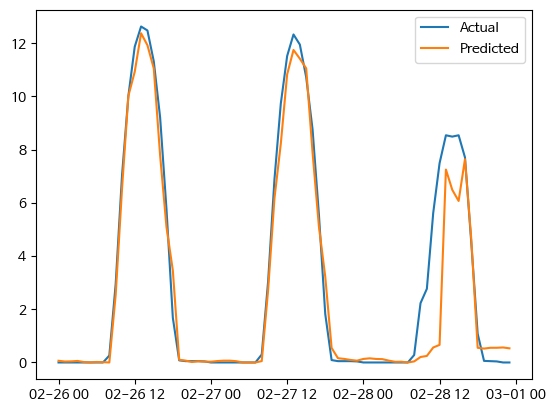

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', '적설',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

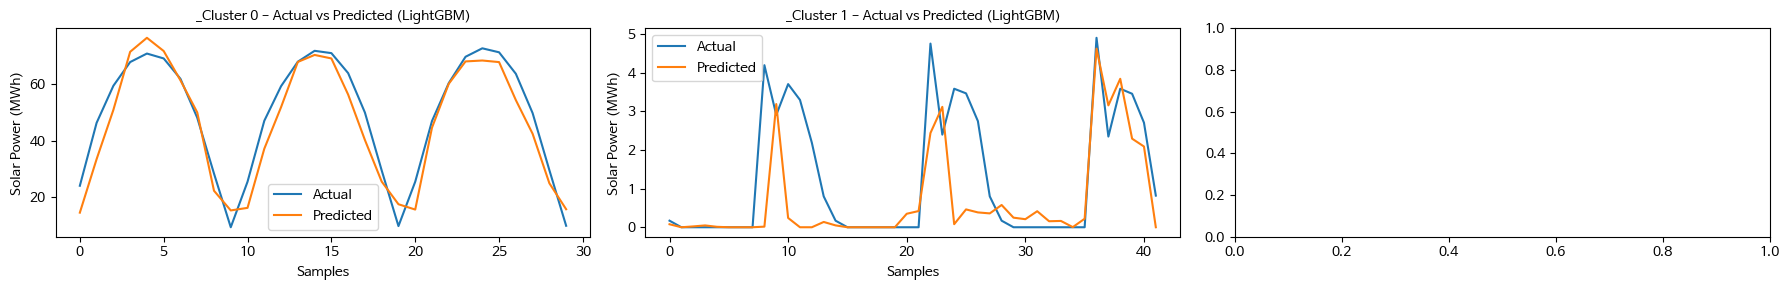

부산시_RMSE scores: [6.428417573472607, 1.404657255341216]
부산시_MAE scores: [5.462552728649068, 0.7925260804251801]
부산시_SMAPE scores: [17.890898138391158, 152.14451048863958]
부산시_MAPE scores: [18.019022828971355, inf]
부산시_Average RMSE: 3.9165374144069114
부산시_Average MAE: 3.127539404537124
부산시_Average SMAPE: 85.01770431351537
부산시_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', '적설', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek',
       'lag_72', 'rolling_mean', 'predict'],
      dtype='object')


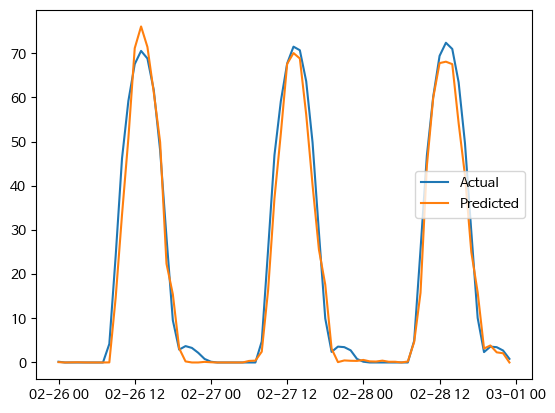

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayo

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

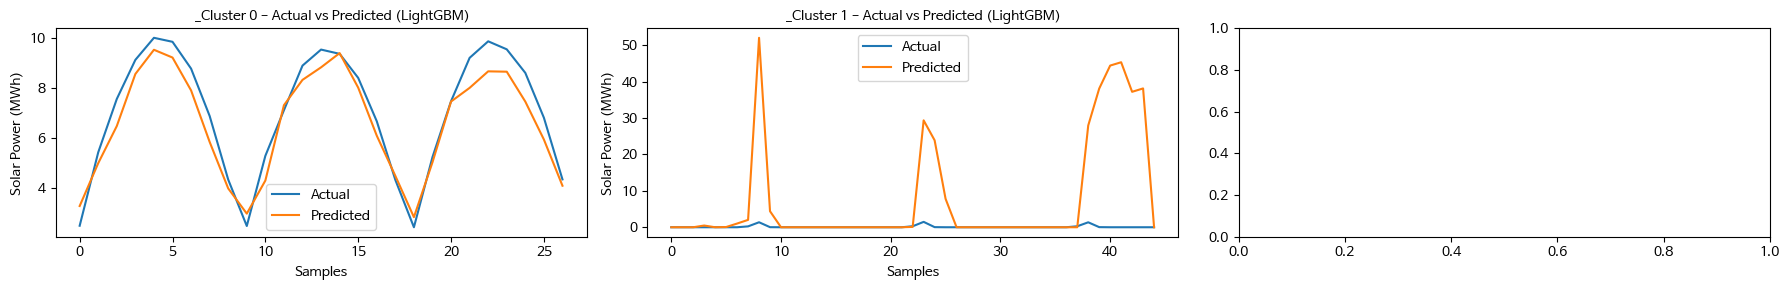

대전시_RMSE scores: [0.7062353048944539, 17.01560148202493]
대전시_MAE scores: [0.6118087834829891, 7.738155352982618]
대전시_SMAPE scores: [9.922599389730955, 195.55131651329717]
대전시_MAPE scores: [9.784906329823984, inf]
대전시_Average RMSE: 8.860918393459691
대전시_Average MAE: 4.174982068232803
대전시_Average SMAPE: 102.73695795151406
대전시_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


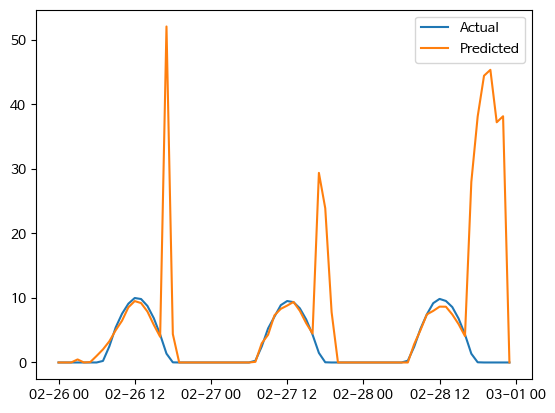

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_m

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
<

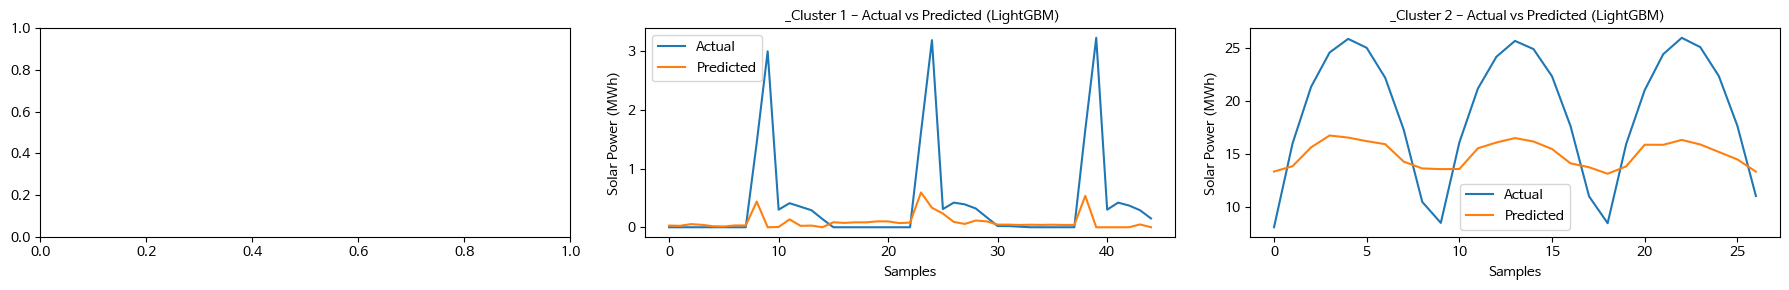

울산시_RMSE scores: [0.8448101850109627, 6.285843622990108]
울산시_MAE scores: [0.38302129382377353, 5.746771383363773]
울산시_SMAPE scores: [168.12046964945714, 32.899327955828426]
울산시_MAPE scores: [inf, 30.896776079141013]
울산시_Average RMSE: 3.5653269040005355
울산시_Average MAE: 3.064896338593773
울산시_Average SMAPE: 100.50989880264278
울산시_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


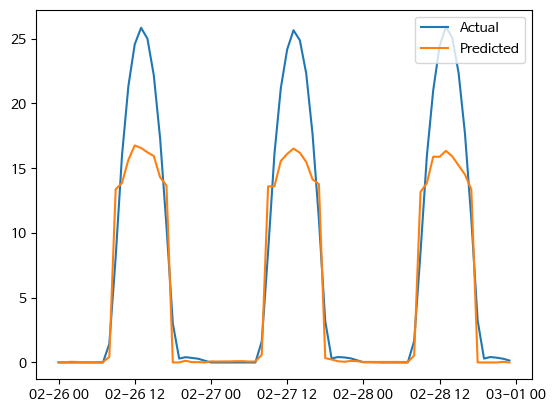

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

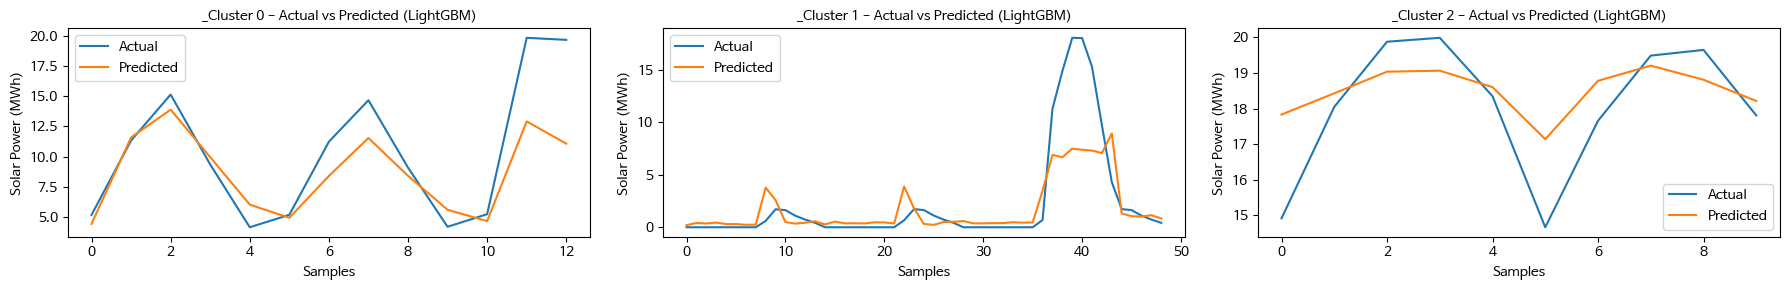

세종시_RMSE scores: [3.373894511009862, 3.000688030907894, 1.363361892608547]
세종시_MAE scores: [2.236381520812018, 1.5340370485845587, 1.0436675054759128]
세종시_SMAPE scores: [20.999167934720575, 133.4504315326157, 6.009301729667955]
세종시_MAPE scores: [19.846125556792696, inf, 6.3090659873384105]
세종시_Average RMSE: 2.5793148115087674
세종시_Average MAE: 1.60469535829083
세종시_Average SMAPE: 53.48630039900141
세종시_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '풍향',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


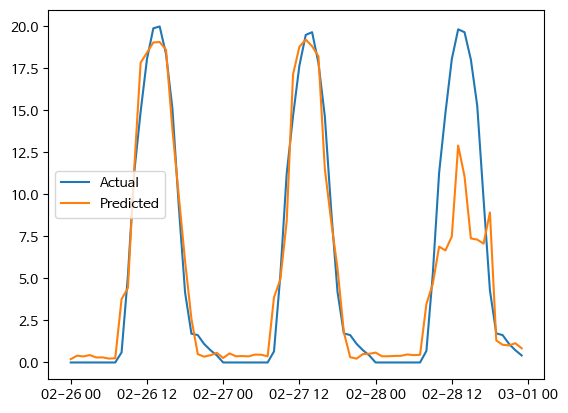

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속', '전운량', 'Cluster',
       'year', 'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'da

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

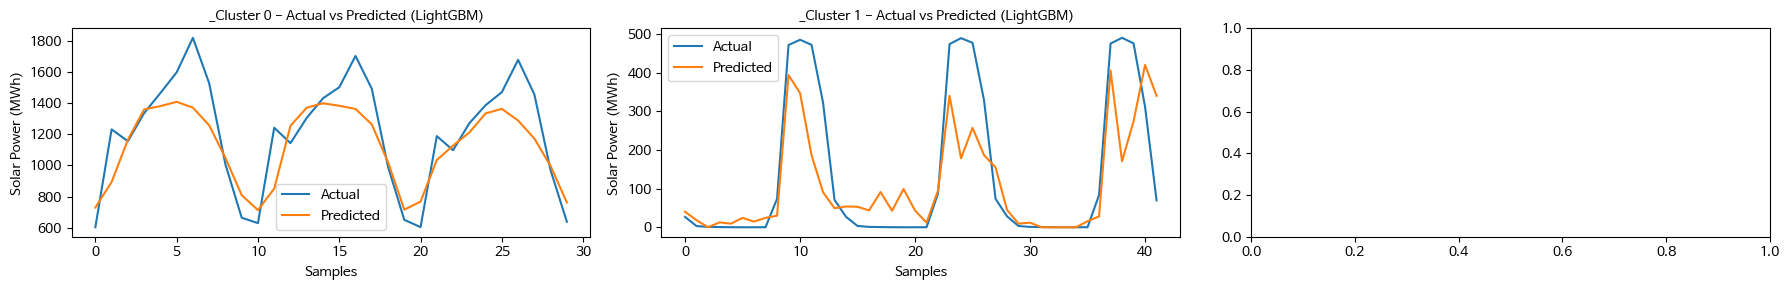

전라남도_RMSE scores: [195.40968664108962, 121.29604843995581]
전라남도_MAE scores: [150.60560596057758, 78.33447315339366]
전라남도_SMAPE scores: [13.081495454895325, 124.33422507346114]
전라남도_MAPE scores: [12.56677949196638, 1.6528989280081926e+17]
전라남도_Average RMSE: 158.3528675405227
전라남도_Average MAE: 114.47003955698563
전라남도_Average SMAPE: 68.70786026417824
전라남도_Average MAPE: 8.264494640040963e+16
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '중하층운량', '풍속',
       '전운량', 'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


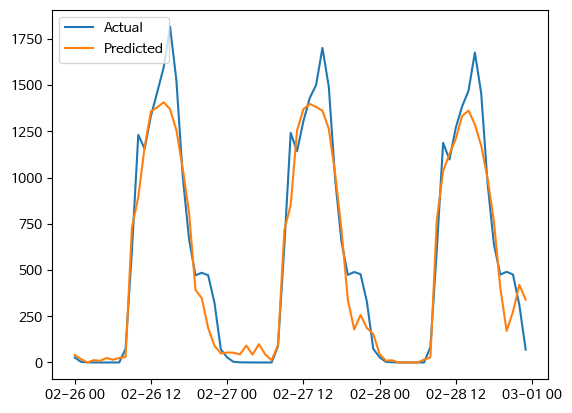

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

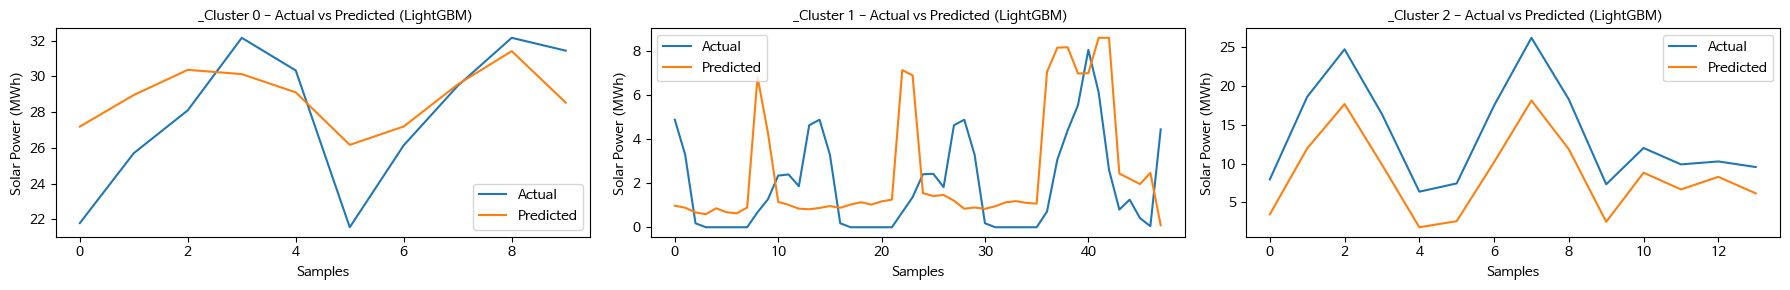

인천시_RMSE scores: [2.8647273083090905, 2.839348211926803, 5.47260339409336]
인천시_MAE scores: [2.3592835577578004, 2.22299879886716, 5.177710891542686]
인천시_SMAPE scores: [8.802244837620696, 134.64991194211808, 55.57249683924399]
인천시_MAPE scores: [9.321701558476741, inf, 41.78615006179622]
인천시_Average RMSE: 3.725559638109751
인천시_Average MAE: 3.2533310827225486
인천시_Average SMAPE: 66.3415512063276
인천시_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '중하층운량', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


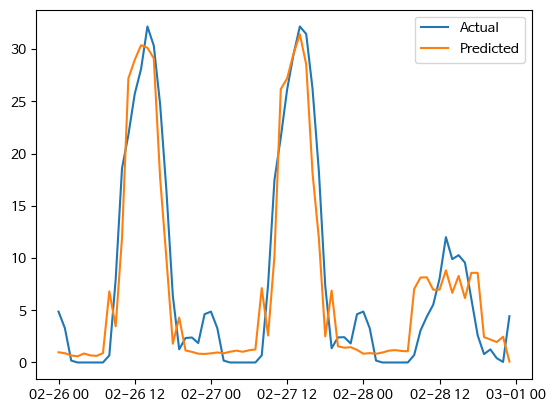

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'Cluster', 'year', 'month',
       'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_m

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

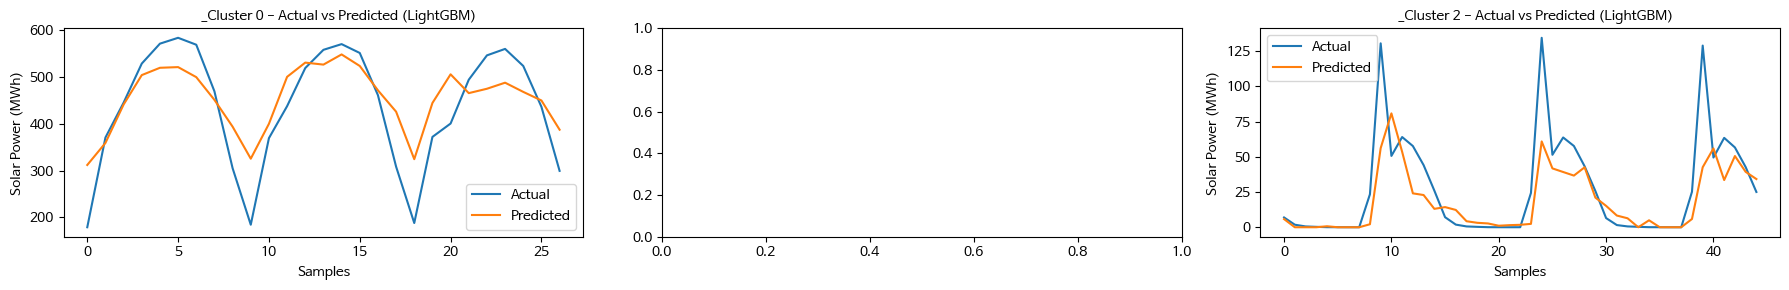

전라북도_RMSE scores: [70.78727788013471, 23.624565843765335]
전라북도_MAE scores: [57.67236785507966, 12.963079880082859]
전라북도_SMAPE scores: [15.590450605495429, 118.38873553207736]
전라북도_MAPE scores: [18.361774901025537, 1127.8556491908741]
전라북도_Average RMSE: 47.205921861950024
전라북도_Average MAE: 35.317723867581265
전라북도_Average SMAPE: 66.98959306878639
전라북도_Average MAPE: 573.1087120459498
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


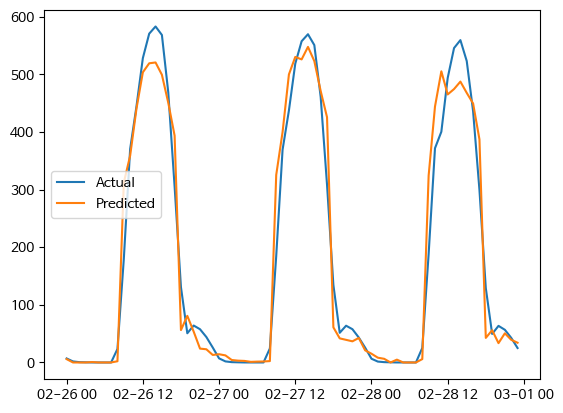

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayo

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
<

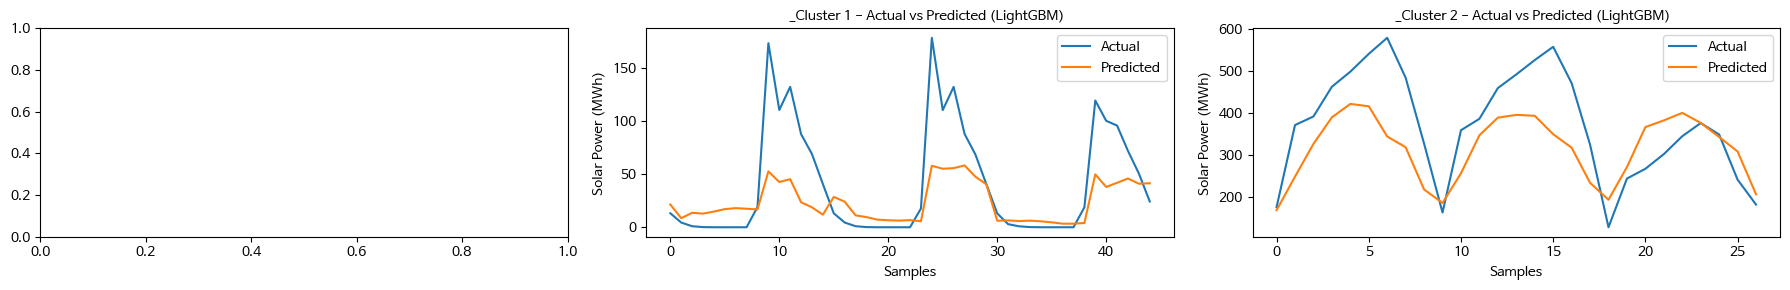

충청남도_RMSE scores: [40.68037436559293, 103.6980650740037]
충청남도_MAE scores: [26.925141384366295, 86.07055334097087]
충청남도_SMAPE scores: [122.44561890056198, 24.307357956106923]
충청남도_MAPE scores: [inf, 22.69921539886928]
충청남도_Average RMSE: 72.18921971979832
충청남도_Average MAE: 56.49784736266859
충청남도_Average SMAPE: 73.37648842833445
충청남도_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


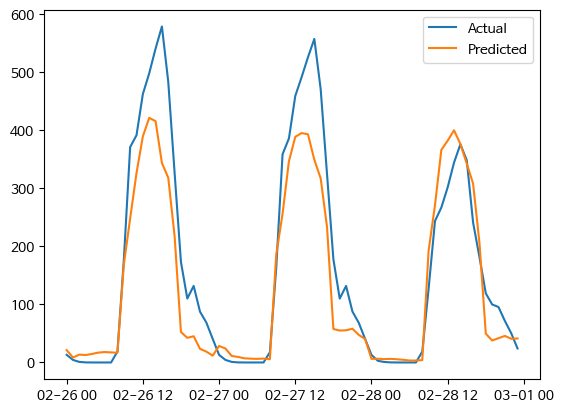

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'Cluster', 'year', 'month',
       'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean'],
   

<ipython-input-14-d455448fd7aa>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
<ipython-input-14-d455448fd7aa>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/

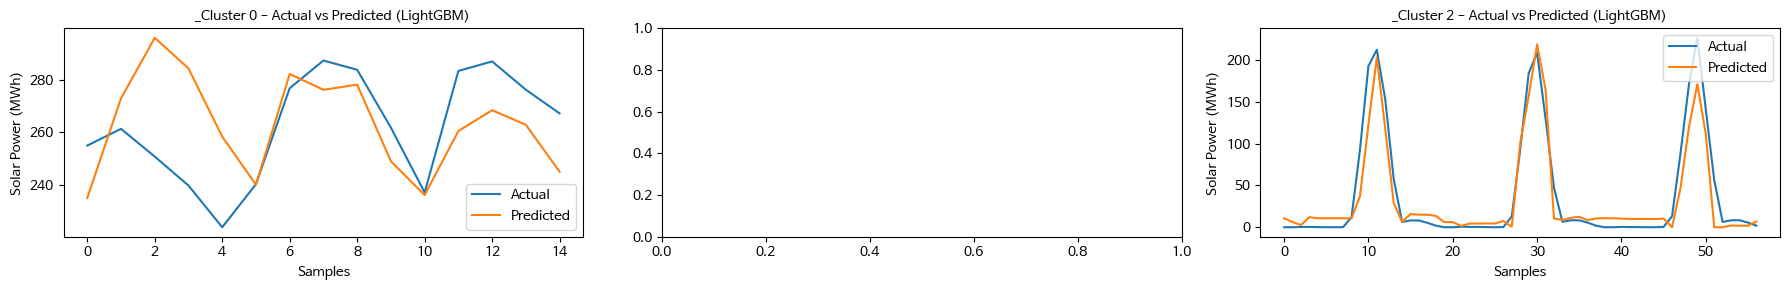

제주도_RMSE scores: [22.513089716735454, 22.0723108450479]
제주도_MAE scores: [17.8868047355544, 14.94218617292237]
제주도_SMAPE scores: [6.8131714117265565, 121.22060611504702]
제주도_MAPE scores: [6.993281257858164, inf]
제주도_Average RMSE: 22.29270028089168
제주도_Average MAE: 16.414495454238384
제주도_Average SMAPE: 64.01688876338679
제주도_Average MAPE: inf
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '중하층운량', '전운량', 'date',
       'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


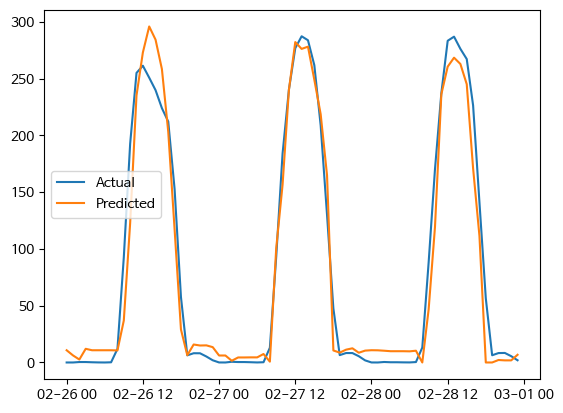

<ipython-input-14-d455448fd7aa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-14-d455448fd7aa>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans
<ipython-input-14-d455448fd7aa>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

데이터 로드 및 전처리
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
과거 값 피처 생성후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
클러스터 라벨 붙인 후 
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')
lightgbm모델 돌리기 전
Index(['일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량', 'Cluster', 'year',
       'month', 'day', 'dayofweek', 'lag_72', 'rolling_mean'],
      dtype='object')
마지막으로 모델 다 돌린 후 cluster
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayo

<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4366 (\N{HANGUL CHOSEONG CHIEUCH}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4520 (\N{HANGUL JONGSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  plt.tight_layout()
<ipython-input-14-d455448fd7aa>:123: Use

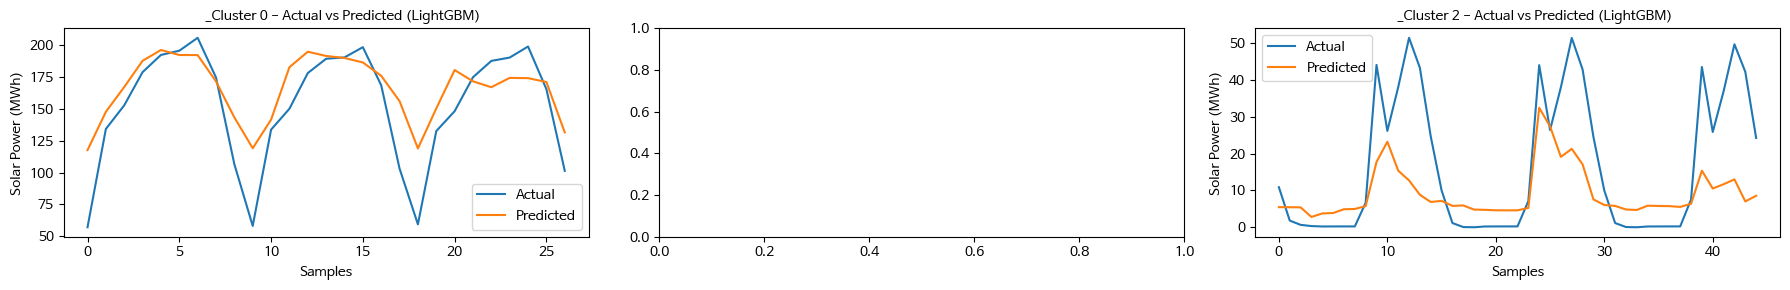

충청북도_RMSE scores: [27.85501058956656, 16.000097294814555]
충청북도_MAE scores: [20.763357122648728, 11.440212901815688]
충청북도_SMAPE scores: [16.809706645712126, 119.4743494501254]
충청북도_MAPE scores: [21.63052866026105, 1330.9426114207063]
충청북도_Average RMSE: 21.927553942190556
충청북도_Average MAE: 16.101785012232206
충청북도_Average SMAPE: 68.14202804791876
충청북도_Average MAPE: 676.2865700404836
모델 돌린 후 최종 칼럼
Index(['Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온', '풍속', '전운량',
       'date', 'Cluster', 'year', 'month', 'day', 'dayofweek', 'lag_72',
       'rolling_mean', 'predict'],
      dtype='object')


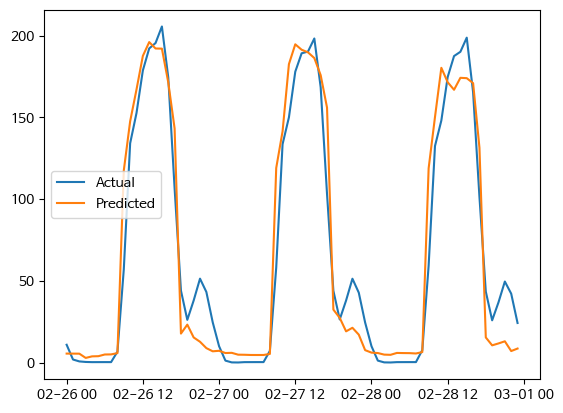

In [ ]:


def smape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mape(y_true, y_pred):
    epsilon = 1e-8  # 아주 작은 값
    y_true = np.where((y_true == 0) & (y_pred == 0), epsilon, y_true)
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# 데이터 로드 및 전처리

for data, name ,traindf in zip(test_df, names,new_no_null_df):
    data['date'] = pd.to_datetime(data['date'])
    print("데이터 로드 및 전처리")
    print(data.columns)


    # 최적의 군집 수 설정 (엘보우 그래프 참고)
    optimal_clusters = 3

    # 데이터 스케일링 및 KMeans 클러스터링
    scaler = RobustScaler()
    # data_scaled = scaler.fit_transform(data.drop('시간',axis=1))
    data_scaled = scaler.fit_transform(data[["일사","일조"]])
    clustermodel=joblib.load(f'/content/drive/MyDrive/new_model/kmeans/kmeans_model_{name}.joblib')
    kmeans =clustermodel.predict(data_scaled)
    # data['Cluster'] = kmeans.labels_
    data['Cluster'] = kmeans

    rmse_scores = []
    mae_scores = []
    smape_scores = []
    mape_scores = []


    fig, axes = plt.subplots(1, optimal_clusters, figsize=(6 * optimal_clusters, 3))

    # 예측값을 저장할 빈 리스트 생성
    predict_list=[0]*len(data)
    # 날짜 피처 생성
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek

    # 과거 값 (lag) 피처 생성
    # data['lag_1'] = data['Solar_Power(MWh)'].shift(1)
    # data['lag_2'] = data['Solar_Power(MWh)'].shift(2)
    # data['rolling_mean'] = data['Solar_Power(MWh)'].rolling(window=3).mean()
    data['lag_72'] = data['Solar_Power(MWh)'].shift(72)
    data["lag_72"][71]=traindf["Solar_Power(MWh)"][len(traindf)-1]
    data['rolling_mean'] = data['Solar_Power(MWh)'].rolling(window=72).mean()
    data['rolling_mean'][0] = data['Solar_Power(MWh)'].rolling(window=72).mean().to_list()[-1]
    print("과거 값 피처 생성후 ")
    print(data.columns)

    for cluster in np.unique(data['Cluster']):
        cluster_data = data[data['Cluster'] == cluster].reset_index(drop=True)
        print("클러스터 라벨 붙인 후 ")
        print(cluster_data.columns)
        if "predict" in cluster_data.columns:
            cluster_data.drop("predict",axis=1,inplace=True)
        else:
          pass
        # LightGBM 모델
        X_lightgbm = cluster_data.drop(columns=['Solar_Power(MWh)', 'date'])
        y_lightgbm = cluster_data['Solar_Power(MWh)'].values.reshape(-1, 1)
        print("lightgbm모델 돌리기 전")
        print(X_lightgbm.columns)
        scaler_X = RobustScaler()
        scaler_y = RobustScaler()

        X_lightgbm_scaled = scaler_X.fit_transform(X_lightgbm)
        y_lightgbm_scaled = scaler_y.fit_transform(y_lightgbm)

        best_model=joblib.load(f'/content/drive/MyDrive/new_model/lightgbm/lightgbm_cluster_{cluster}_{name}.joblib')

        # 예측
        y_pred_lgb = best_model.predict(X_lightgbm_scaled)

        # 예측값을 원래 스케일로 복원
        y_test_orig = scaler_y.inverse_transform(y_lightgbm_scaled) # test
        y_pred_lgb_original = scaler_y.inverse_transform(y_pred_lgb.reshape(-1, 1)) # test 예측

        # 0 미만의 예측 값을 0으로 처리
        y_pred_lgb_original = np.maximum(0, y_pred_lgb_original)

        rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_lgb_original))
        mae = mean_absolute_error(y_test_orig, y_pred_lgb_original)
        smape_val = smape(y_test_orig, y_pred_lgb_original)
        mape_val = mape(y_test_orig, y_pred_lgb_original)

        rmse_scores.append(rmse)
        mae_scores.append(mae)
        smape_scores.append(smape_val)
        mape_scores.append(mape_val)

        axes[cluster].plot(y_test_orig, label='Actual')
        axes[cluster].plot(y_pred_lgb_original, label='Predicted')
        axes[cluster].set_title(f'{name}_Cluster {cluster} - Actual vs Predicted (LightGBM)', fontproperties=font_manager.FontProperties(fname=font_path))
        axes[cluster].set_xlabel('Samples')
        axes[cluster].set_ylabel('Solar Power (MWh)')
        axes[cluster].legend()





        print("마지막으로 모델 다 돌린 후 cluster")
        print(cluster_data.columns)


        print("마지막으로 모델 다 돌린 후 data")
        print(data.columns)

        # 예측값을 데이터프레임에 추가
        data.loc[data['Cluster'] == cluster, 'predict'] = y_pred_lgb_original
        print("예측값을 데이터프레임에 추가")
        print(data.columns)


    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/new_model/train_pic/{name}_clusters_prediction.png')
    plt.show()


    print(f"{name}_RMSE scores:", rmse_scores)
    print(f"{name}_MAE scores:", mae_scores)
    print(f"{name}_SMAPE scores:", smape_scores)
    print(f"{name}_MAPE scores:", mape_scores)
    print(f"{name}_Average RMSE:", np.mean(rmse_scores))
    print(f"{name}_Average MAE:", np.mean(mae_scores))
    print(f"{name}_Average SMAPE:", np.mean(smape_scores))
    print(f"{name}_Average MAPE:", np.mean(mape_scores))



    print("모델 돌린 후 최종 칼럼")
    print(data.columns)

    # 예측 결과 데이터프레임 리스트에 추가
    # predict_asemble_data.append(data)
    data.to_csv(f"/content/drive/MyDrive/new_model/predicted_data/predicted_concat_data_{name}.csv")
    plt.plot(data["date"],data["Solar_Power(MWh)"], label='Actual')
    plt.plot(data["date"],data["predict"] , label='Predicted')
    # plt.plot(data["date"], data["Solar_Power(MWh)"],data["date"],data["predict"] , 'r-')
    plt.legend()

    plt.show()
